
<strong><font size="5">Capstone Group 5 AIML May 23 A- NLP 1 Project [NLP-ChatBot]</font>

<font size="4"> Contributors:</font>
</strong>
<font size="3">Anurag, Renuka, Rahul, Anjali, Sreekanth, Harshal, Sanket</font>

<font size="5">Step 1: Import the data [ 3 points ]</font>

In [1]:
# pip install wordcloud

In [2]:
# pip install textblob

In [3]:
# pip install xgboost

Import required libraries

In [4]:
import sklearn
print(sklearn.__version__)

1.2.2


In [5]:
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2
# !pip install imblearn

In [6]:
# pip install --upgrade imbalanced-learn

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

import unicodedata
import unidecode
# from autocorrect import Speller
from string import punctuation
# from wordcloud import WordCloud, STOPWORDS
# from textblob import TextBlob

import re
import string
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

from textblob import TextBlob

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

from keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

from ann_visualizer.visualize import ann_viz;
from tensorflow.keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix,make_scorer,recall_score

from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
# from sklearn.datasets import make_classification  # for sample data generation
# from collections import Counter  # for counting class labels

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Load data

In [8]:
data = pd.read_excel("data.xlsx")

In [9]:
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [10]:
data.shape

(425, 11)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.7+ KB


**Observations:**
1. There are total 425 rows and 11 columns. 
2. Out of 11 columns, 1 columns is of integer type, 1 column is of datetime type and remaining 9 columns are of Object type. 
3. Column "Unnamed: 0" is not required as it contains integer values of serial numbers, hence this can be deleted. 

<font size="5">Step 2: Data cleansing [ 5 points ]</font>

2a. Column "Unnamed: 0" is not required, hence deleting the column. 

In [12]:
data=data.drop(columns='Unnamed: 0')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      425 non-null    datetime64[ns]
 1   Countries                 425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Genre                     425 non-null    object        
 7   Employee or Third Party   425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


**2b.** One of the most important steps in data pre-processing is refining variable/column names. Column names provide the meaning or context to the data. Renaming column names enhances the readability and understandability of our data, particularly when working with large datasets. It facilitates easier data merging, manipulation, and helps maintain consistency across different datasets. In this dataset, we have refined column names such as "Data" to "Date" and "Genre" to "Gender" for clarity and consistency.

In [14]:
data = data.rename(columns={'Data': 'Date',
                           'Genre': 'Gender'})

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      425 non-null    datetime64[ns]
 1   Countries                 425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employee or Third Party   425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


In [16]:
data.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


**2c.** Checking null values & duplicate rows in the dataset and removing them.

In [17]:
def eda(data):
    print("Running Data Cleansing on the dataframe:")
    #Null value check
    row_nan_count = data.isnull().any(axis=1).sum()
    print(f"1. Number of rows with null values: {row_nan_count}")
    # Count duplicates (considering all columns)
    num_duplicates = data.duplicated().sum()
    print("2. Number of duplicate rows:", num_duplicates)
    # Drop Duplicates
    print("3. Before deleting duplicate rows, number of records:", data.shape[0]," and columns:", data.shape[1])
    print("3.1 Deleting duplicate rows:")
    data.drop_duplicates(inplace=True)
    #Print final datashape
    print("4. After deleting duplicate rows, number of records:", data.shape[0]," and columns:", data.shape[1])
    print(data.shape)

In [18]:
data_new=data
eda(data)

Running Data Cleansing on the dataframe:
1. Number of rows with null values: 0
2. Number of duplicate rows: 7
3. Before deleting duplicate rows, number of records: 425  and columns: 10
3.1 Deleting duplicate rows:
4. After deleting duplicate rows, number of records: 418  and columns: 10
(418, 10)


**Observations:**
1. Successfully deleted the column with name "Unnamed: 0".
2. Successfully renamed columns (Data" to "Date" and "Genre" to "Gender")
3. There were 0 rows with null values. 
4. There were 7 duplicate rows in the dataset. Successfully deleted all 7 duplicate rows. 
5. Post deleting duplicate rows, there are now 418 rows and 10 columns. 

In [19]:
def data_summary(df):
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary.rename(columns={'index': 'Name'}, inplace=True)
    summary['Missing_values'] = df.isnull().sum().values
    summary['Unique_values'] = df.nunique().values
    summary['Duplicate_values'] = df.duplicated().sum()

    return summary

In [20]:
data_summary(data)

,Name,dtypes,Missing_values,Unique_values,Duplicate_values
0,Date,datetime64[ns],0,287,0
1,Countries,object,0,3,0
2,Local,object,0,12,0
3,Industry Sector,object,0,3,0
4,Accident Level,object,0,5,0
5,Potential Accident Level,object,0,6,0
6,Gender,object,0,2,0
7,Employee or Third Party,object,0,3,0
8,Critical Risk,object,0,33,0
9,Description,object,0,411,0


In [21]:
data.shape

(418, 10)

In [22]:
data.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [23]:
# Printing the hidden duplicate values in the dataset
print('There are still {} duplicates in the dataset as below'.format(data.duplicated(subset=['Description'],keep=False).sum()))

There are still 14 duplicates in the dataset as below


In [24]:
data[data.duplicated(subset=['Description'],keep=False)].sort_values(by='Description')

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
166,2016-07-07,Country_01,Local_03,Mining,IV,V,Male,Third Party,Others,At moments when the MAPERU truck of plate F1T ...
167,2016-07-07,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,At moments when the MAPERU truck of plate F1T ...
261,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
263,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
412,2017-06-20,Country_01,Local_01,Mining,I,IV,Male,Employee,Others,"In circumstance, the AHK-903 license plate (Em..."
413,2017-06-20,Country_01,Local_01,Mining,I,IV,Male,Third Party,Others,"In circumstance, the AHK-903 license plate (Em..."
130,2016-05-26,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,"In the geological reconnaissance activity, in ..."
131,2016-05-26,Country_03,Local_10,Others,I,I,Male,Employee,Others,"In the geological reconnaissance activity, in ..."
143,2016-06-08,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,Project of Vazante that carried out sediment c...
144,2016-06-08,Country_03,Local_10,Others,I,I,Male,Third Party,Others,Project of Vazante that carried out sediment c...


**Observations:**

1. We can cleary observe that the above dataframe contains 7 duplicates out of which one or two column values are dissimilar where in the Description is matching.

2. We also observe that the incidents which are having duplicate values happened during the same time.
Hence we will be dropping these hidden duplicates which doesn't support logically.

In [25]:
# Dropping the duplicates we detected above.
data.drop_duplicates(subset=['Description'], keep='first', inplace=True)
print('After removing duplicates the shape of the dataset is:', data.shape)

After removing duplicates the shape of the dataset is: (411, 10)


In [26]:
data_summary(data)

,Name,dtypes,Missing_values,Unique_values,Duplicate_values
0,Date,datetime64[ns],0,287,0
1,Countries,object,0,3,0
2,Local,object,0,12,0
3,Industry Sector,object,0,3,0
4,Accident Level,object,0,5,0
5,Potential Accident Level,object,0,6,0
6,Gender,object,0,2,0
7,Employee or Third Party,object,0,3,0
8,Critical Risk,object,0,33,0
9,Description,object,0,411,0


In [27]:
data.shape

(411, 10)

<font size="5">2c. Exploratory Data Analysis (EDA)</font>

<font size="5"> 2c.1 Extracting month & year from Date column </font>

**Observations:**

1. Extracting the month and year from the Date column would provide valuable insights.
2. The Month and Year columns will assist in time series analysis, allowing us to analyze the number of accidents occurring in specific years or months. This analysis helps us understand if there is any seasonal effect.


In [28]:
data['month'] = pd.to_datetime(data['Date']).dt.month
data['year'] = pd.to_datetime(data['Date']).dt.year

In [29]:
data.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,month,year
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,2016
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,1,2016
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,1,2016
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,1,2016
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,1,2016


Modifying column values of "Accident Level" & "Potential Accident Level"

In [30]:
data.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,month,year
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,2016
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,1,2016
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,1,2016
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,1,2016
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,1,2016


**Observations:** 

Replacing the categorical values in the 'Accident Level' and 'Potential Accident Level' columns with numerical values. 

It converts the ordinal categorical variables ('Accident Level' and 'Potential Accident Level') into numerical values, preserving the order or hierarchy among the categories. 

This numerical representation allows the machine learning model to better understand the relationship between different levels of accidents and potential accident levels.

In [31]:
data['Potential Accident Level'] = data['Potential Accident Level'].replace('VI', 'V')

In [32]:
data['Accident Level'].replace({'I': 0, 'II': 1, 'III': 2, 'IV':3, 'V':4}, inplace=True)
data['Potential Accident Level'].replace({'I': 0, 'II': 1, 'III': 2, 'IV':3, 'V':4,}, inplace=True)

<font size="5"> 2c.2 Checking unique values in each column </font>

In [34]:
print("Printing unique values in each column:")
print('')
for col_name in data.columns:
    if(col_name!='Date' and col_name!='Description'):
        print(col_name, ":")
        print('--------------------------------------')
        print(data[col_name].unique())
        print('')

Printing unique values in each column:

Countries :
--------------------------------------
['Country_01' 'Country_02' 'Country_03']

Local :
--------------------------------------
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']

Industry Sector :
--------------------------------------
['Mining' 'Metals' 'Others']

Accident Level :
--------------------------------------
[0 3 2 1 4]

Potential Accident Level :
--------------------------------------
[3 2 0 1 4]

Gender :
--------------------------------------
['Male' 'Female']

Employee or Third Party :
--------------------------------------
['Third Party' 'Employee' 'Third Party (Remote)']

Critical Risk :
--------------------------------------
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substanc

**Observations:**

1. For Columns "Accident Level" and "Potential Accident Level", changed values to numeric. 

<font size="5">2c.3 Univariate Analysis</font>

Univariate Analysis helps in examining the distribution and summary statistics of a single variable. 
The following graphs show a count plot and a pie diagram for the variables Countries, Local cities, Industry sector, Accident Level, Potential Accident Level, Gender, Category of employees, critical risk, month, year that have been affected by the accidents.

In [35]:
#Function to draw count plot.
def drawcountplot(column):
    # Create the countplot
    ax = sns.countplot(x=column, data=data)

    plt.title(column)
    
        # Display the plot
    # Get current figure using plt.gcf()
    fig = plt.gcf()
    fig.set_size_inches((10, 5))
    
    # Get bar heights (counts)
    counts = [patch.get_height() for patch in ax.containers[0].patches]

    # Add text labels above bars (adjust y-position as needed)
    for i, (x, count) in enumerate(zip(ax.containers[0].patches, counts)):
      y_pos = count + 0.1  # Adjust y-position to avoid overlapping bars
      ax.text(x.get_x() + x.get_width() / 2, y_pos, str(count), ha='center', va='bottom')

    if(column=='Critical Risk'):
        plt.xticks(rotation=90)
    
    plt.show()

In [36]:
def draw_count_plot(df,col):
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the DataFrame.")

    plt.figure(figsize=(20, 15))
    
    # Plotting countplot
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x=col, palette="pastel",order=df[col].value_counts().index)
    plt.title(col)
    
    # Plotting pie chart
    plt.subplot(2, 2, 2)
    plt.pie(df[col].value_counts(), autopct="%.2f", labels=df[col].value_counts().index, shadow=True, startangle=-135)
    plt.title(col)
    
    plt.show()

Printing all univariate graphs

Countries


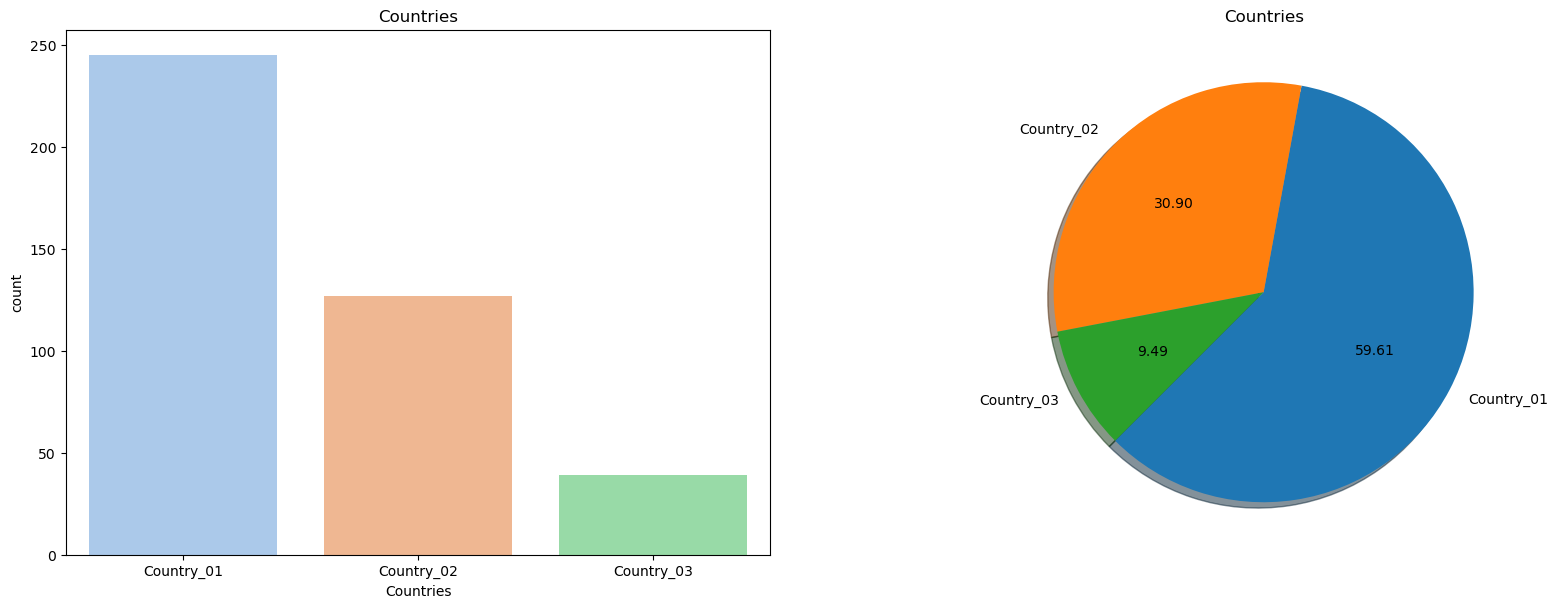

Local


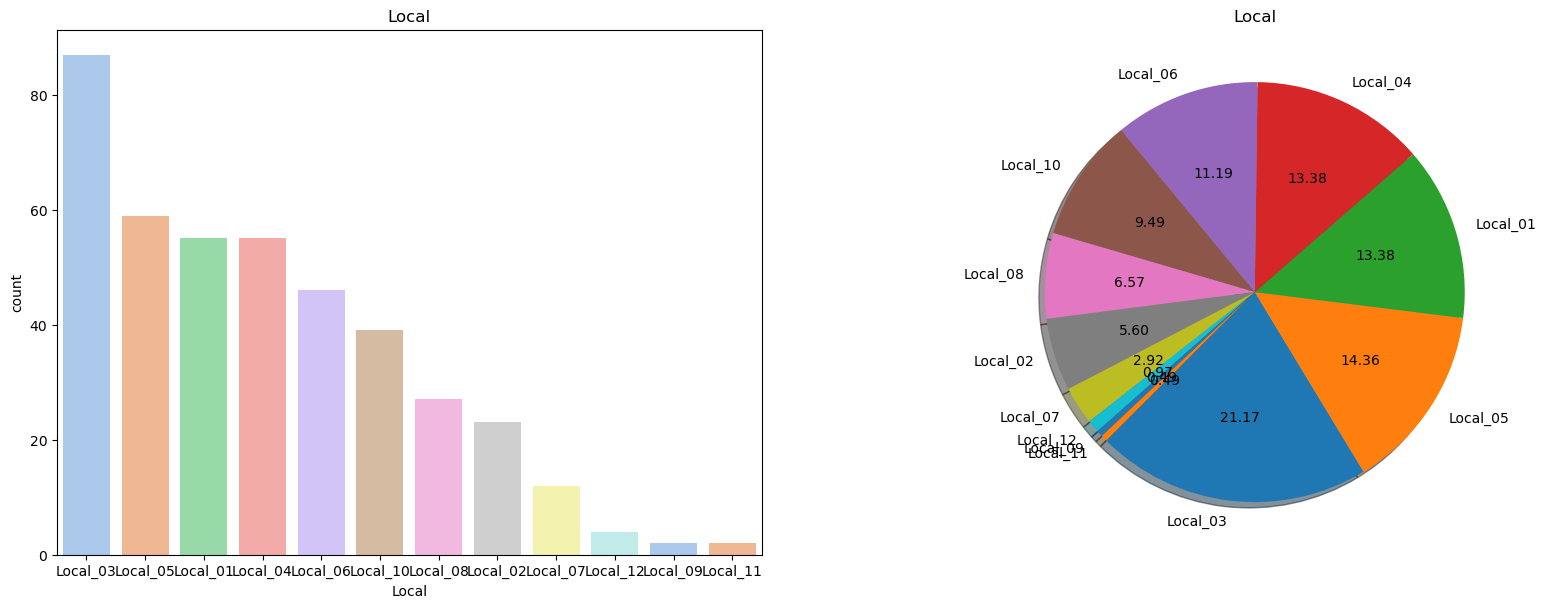

Industry Sector


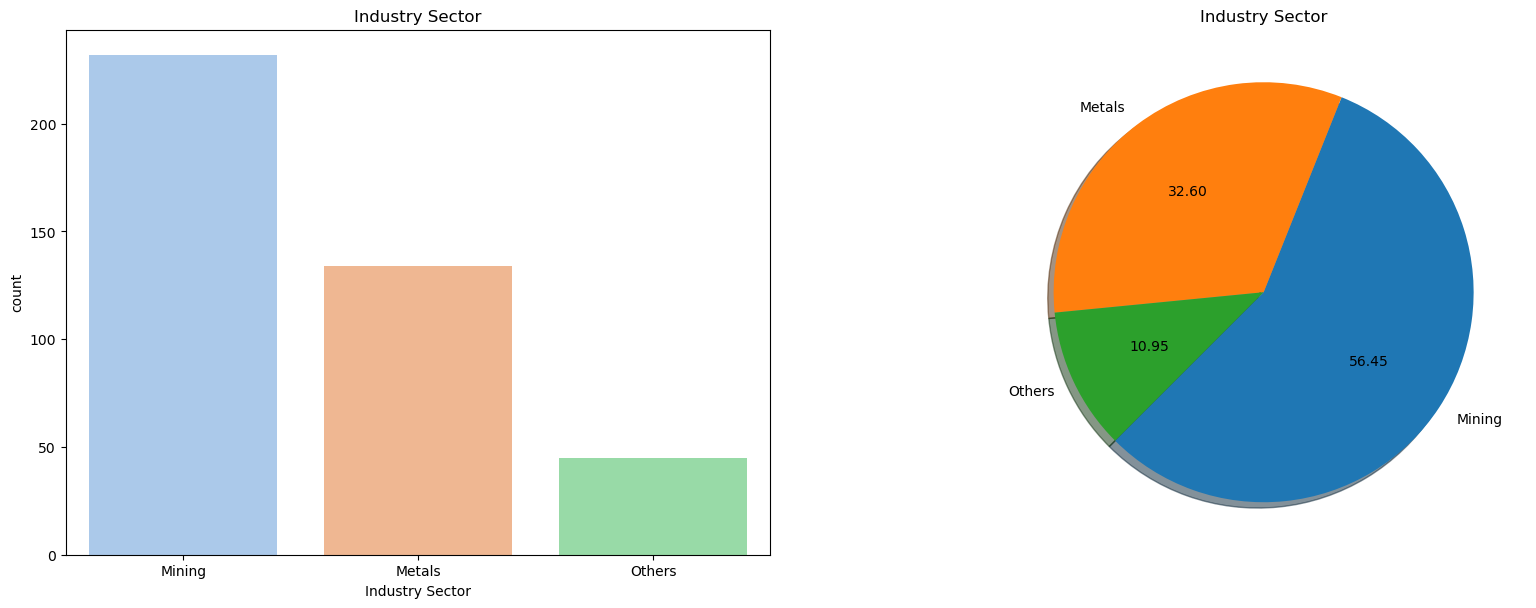

Accident Level


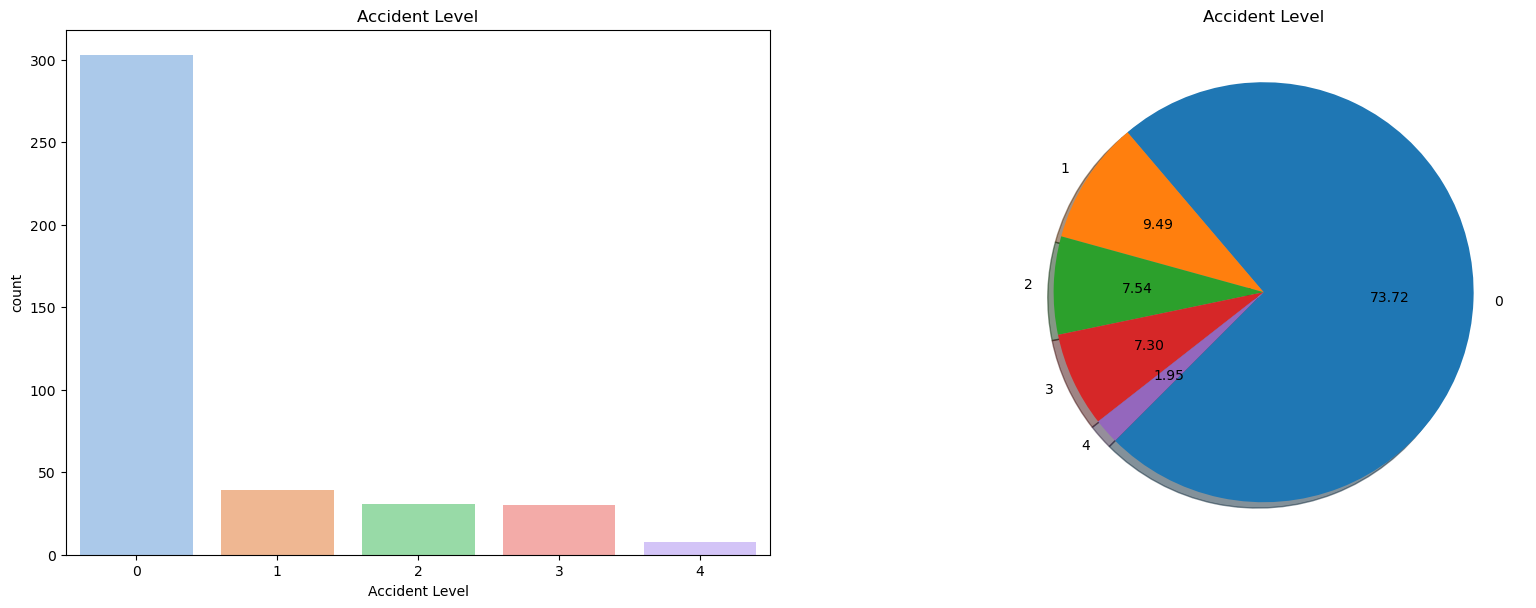

Potential Accident Level


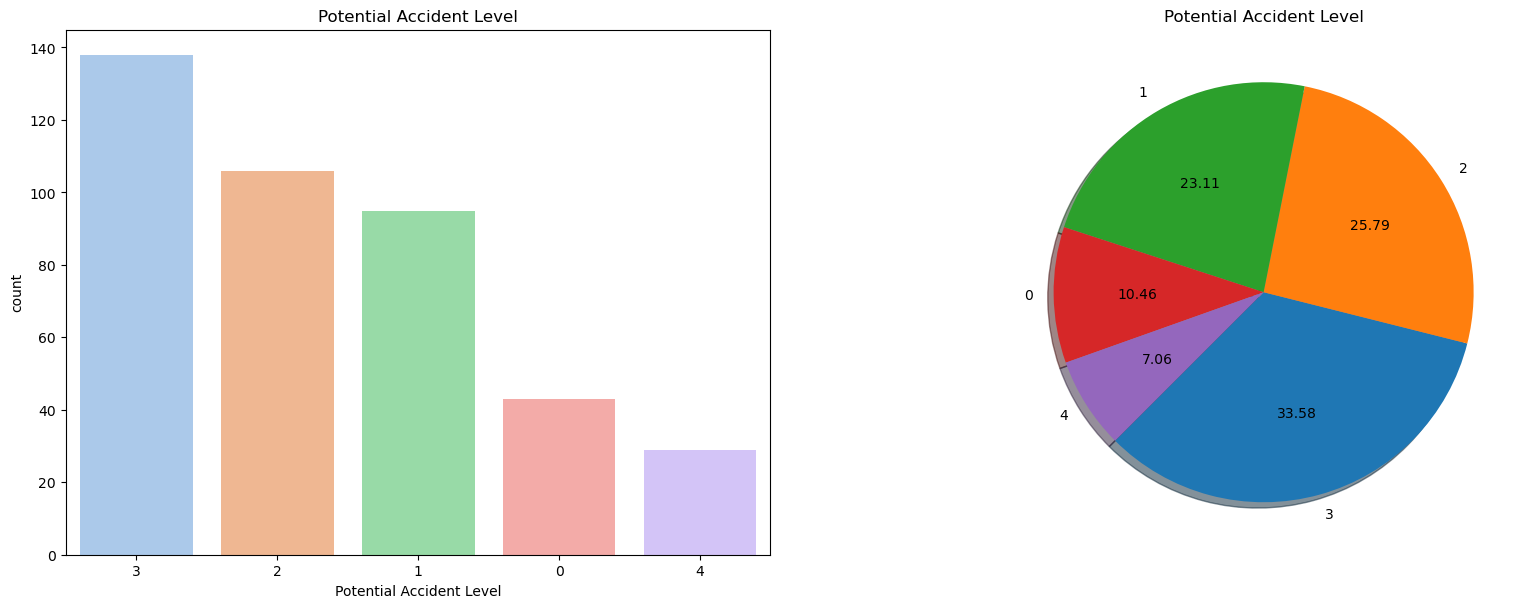

Gender


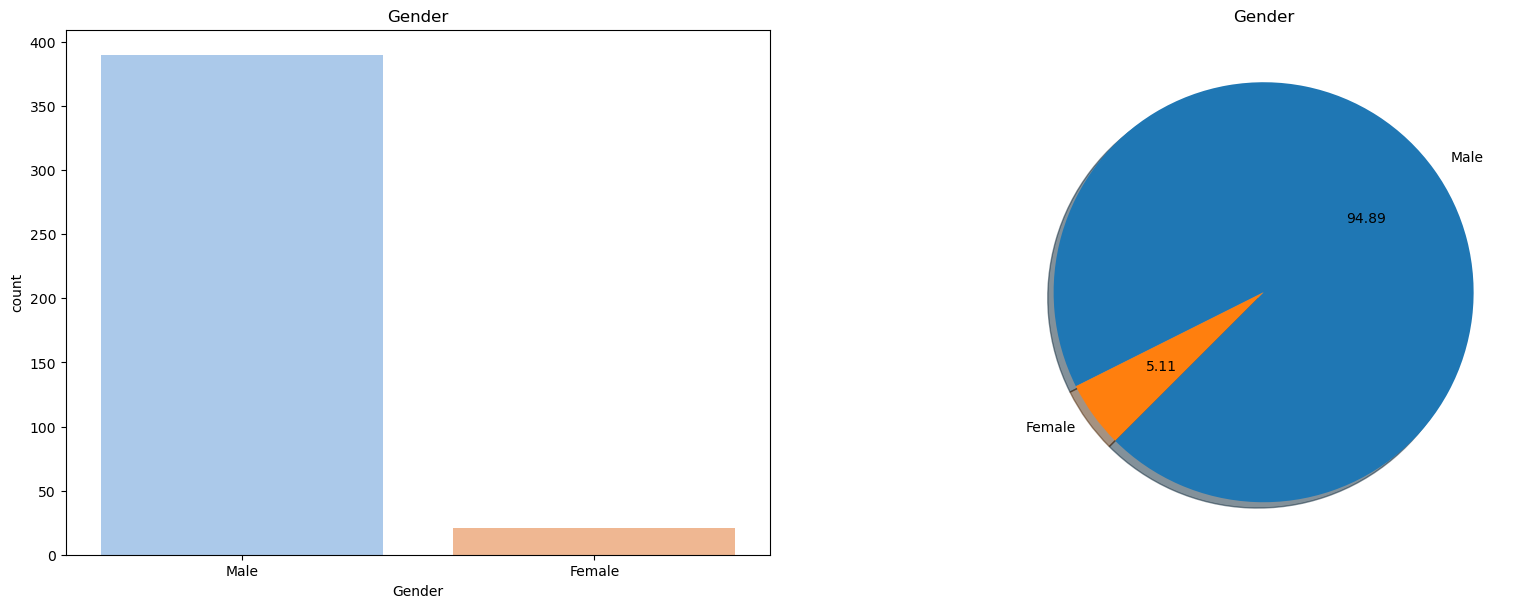

Employee or Third Party


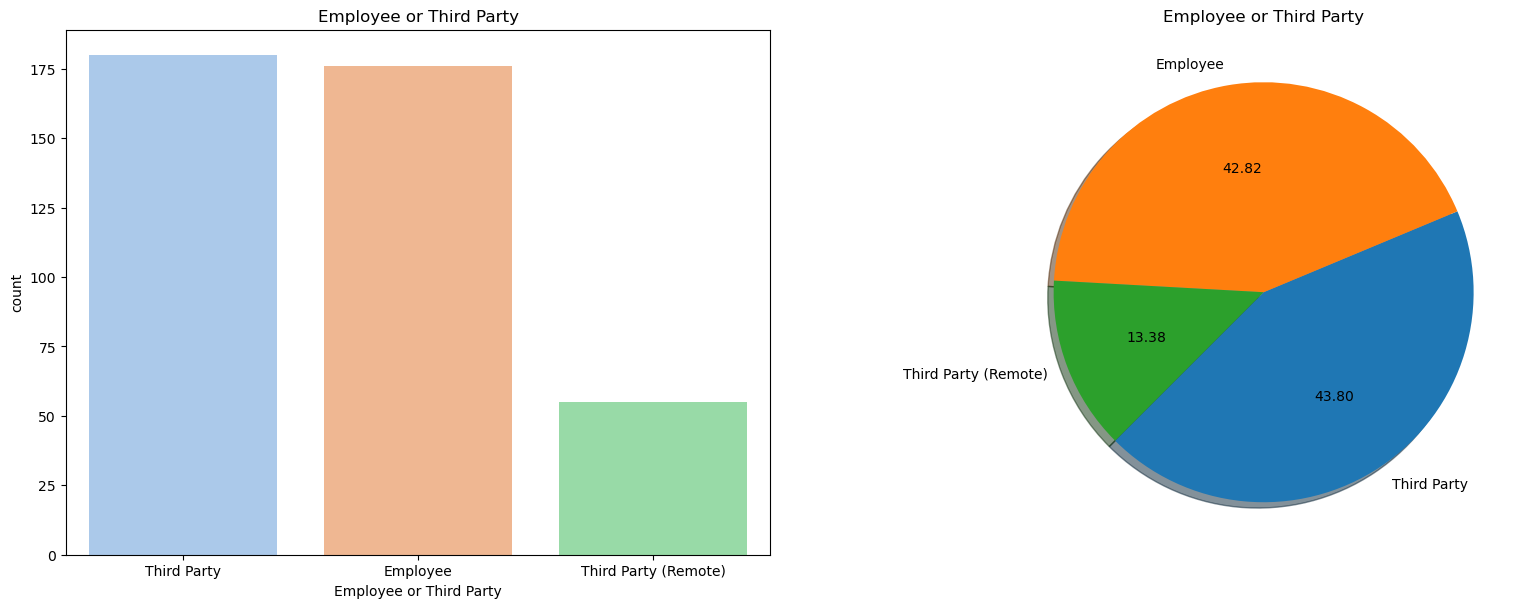

Critical Risk


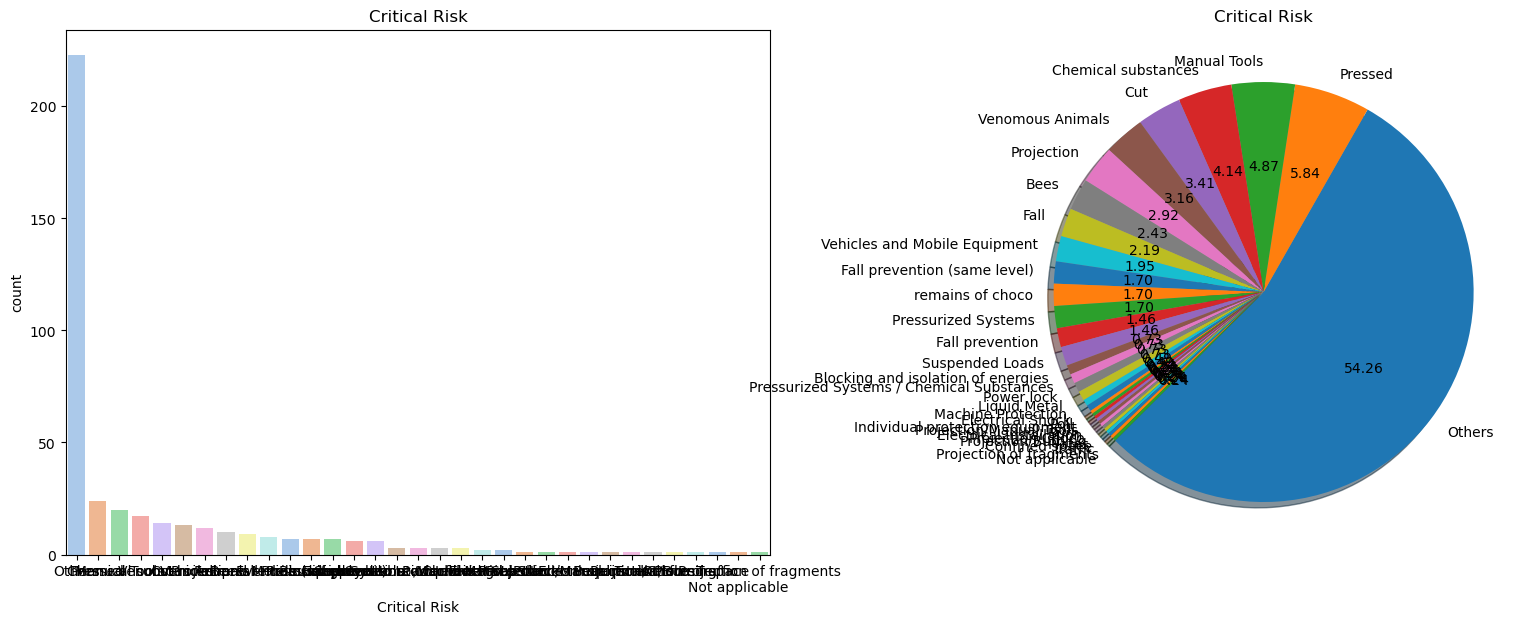

month


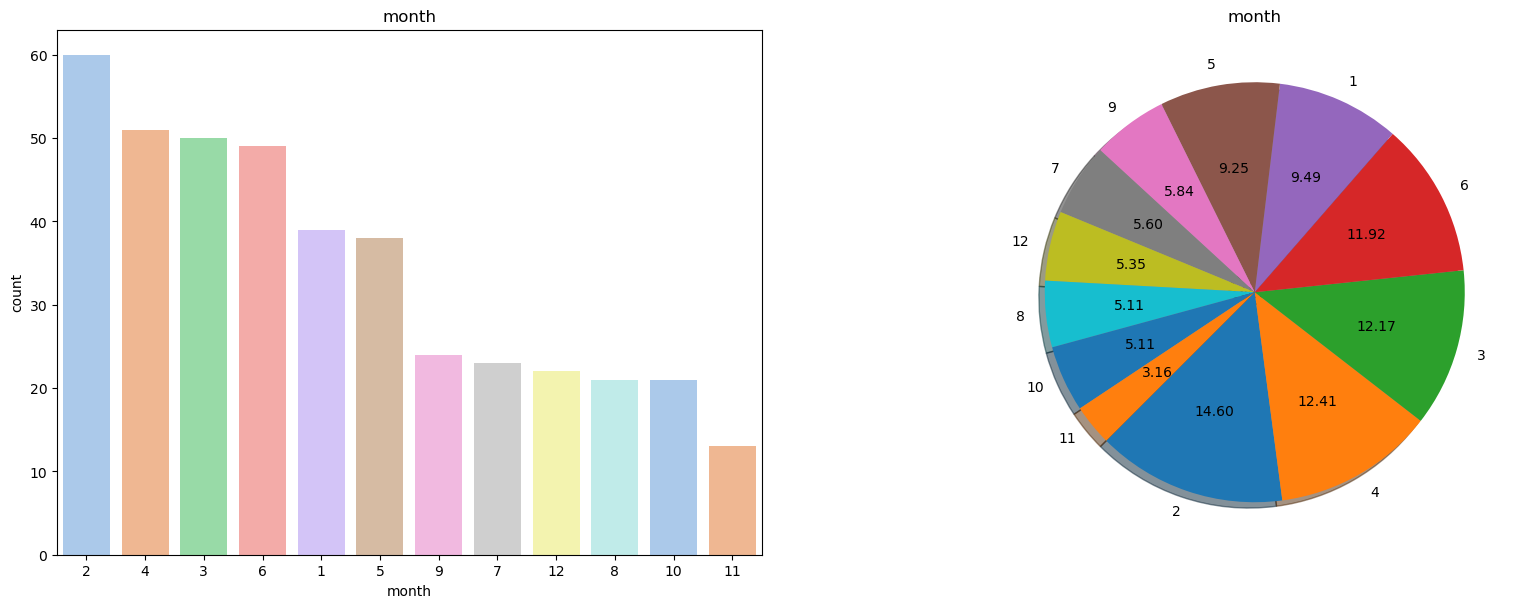

year


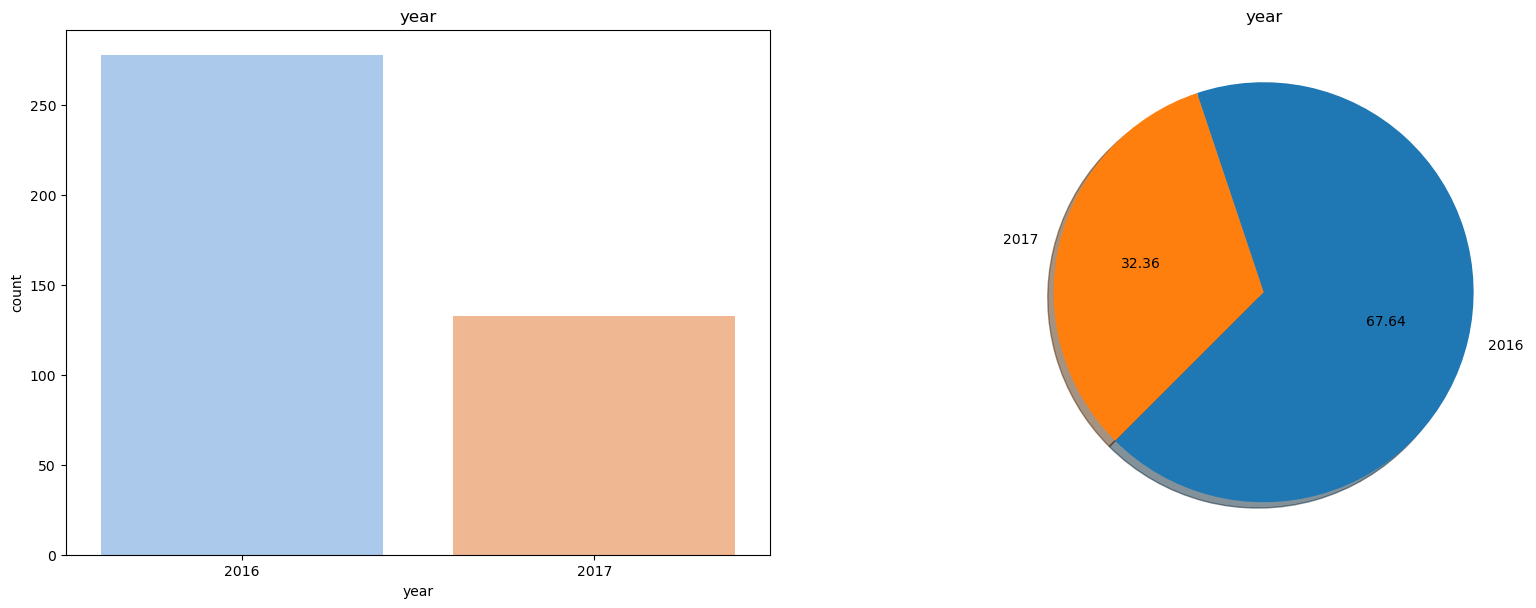

In [37]:
for col_name in data.columns:
    if(col_name!='Date' and col_name!='Description'):
        print(col_name)
        draw_count_plot(data, col_name)

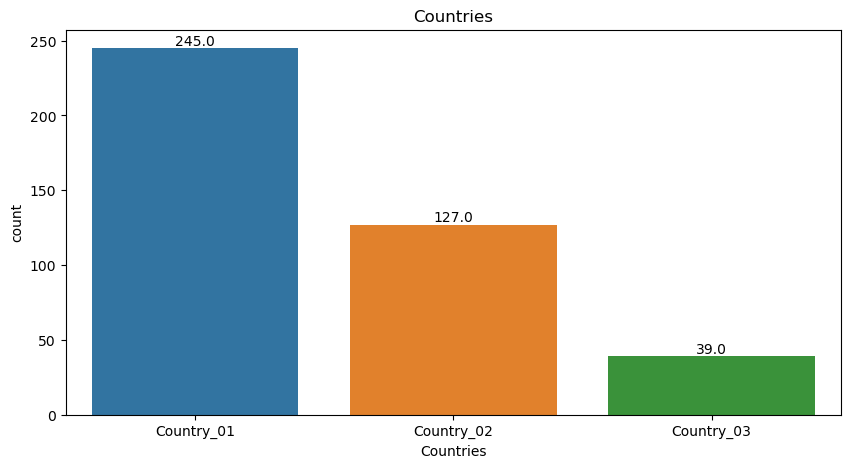

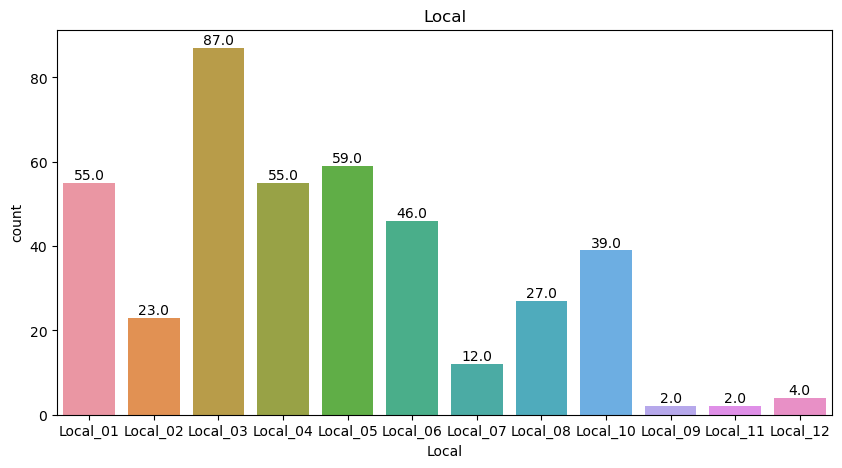

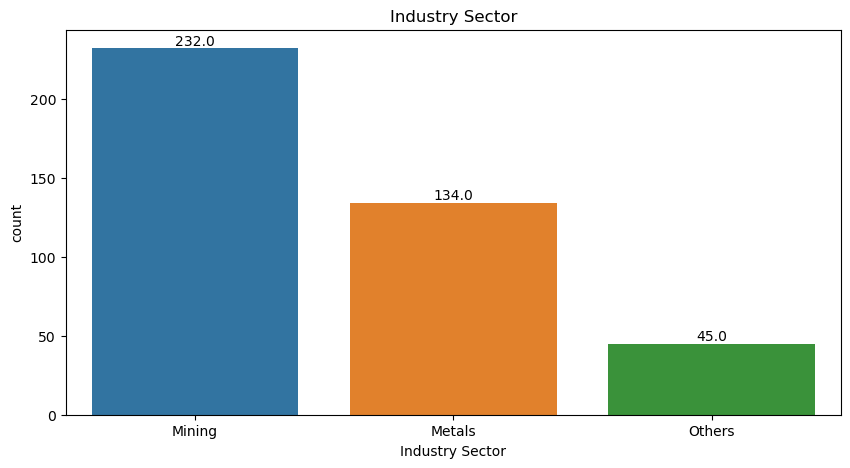

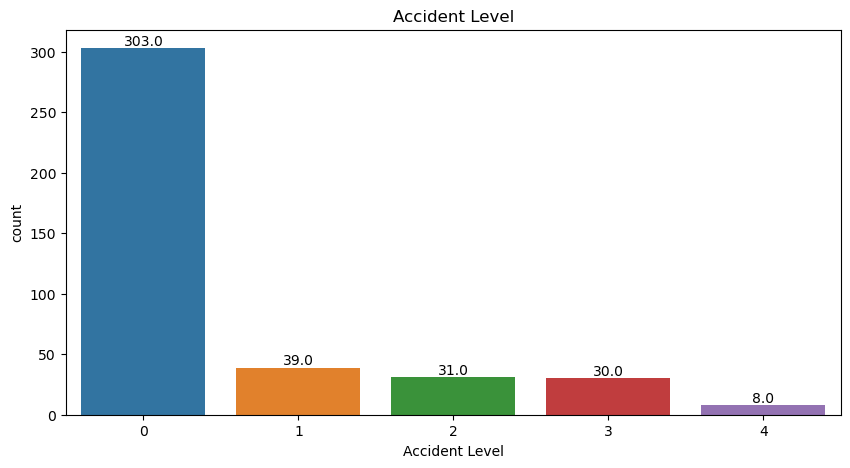

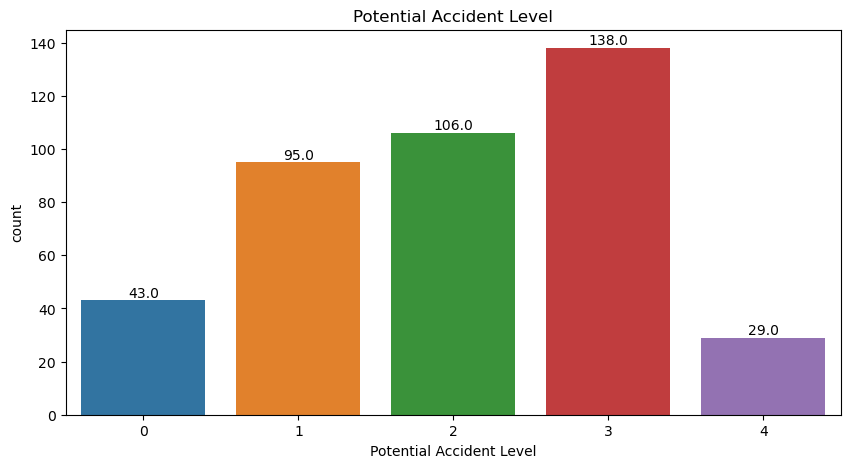

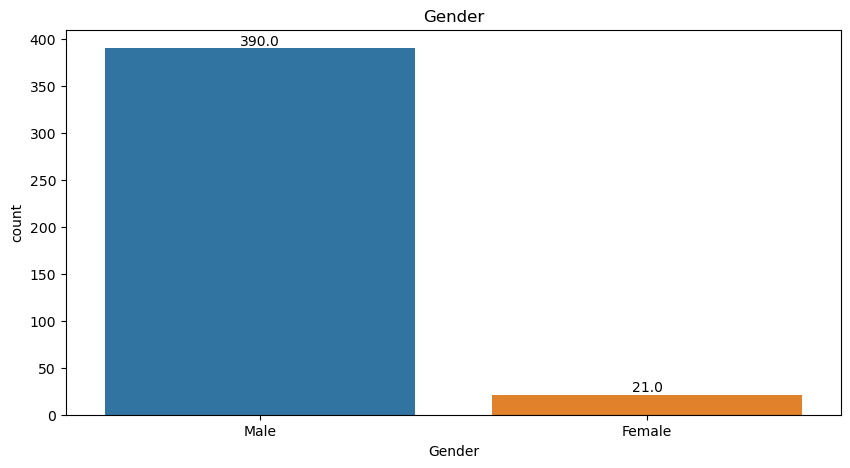

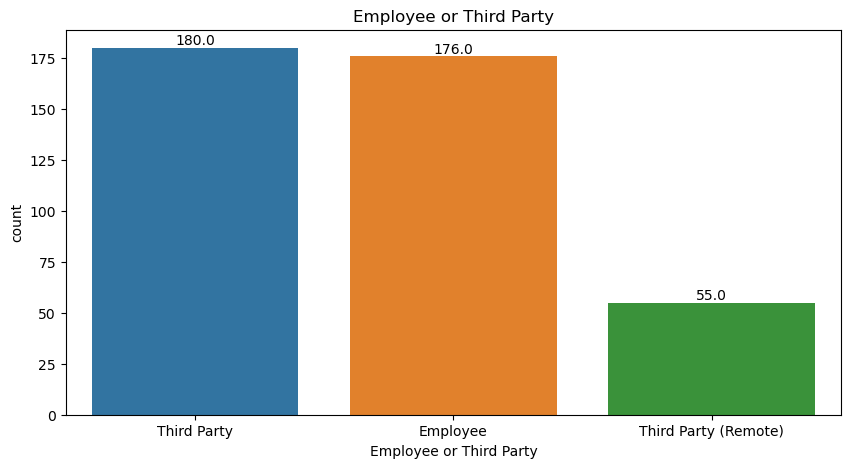

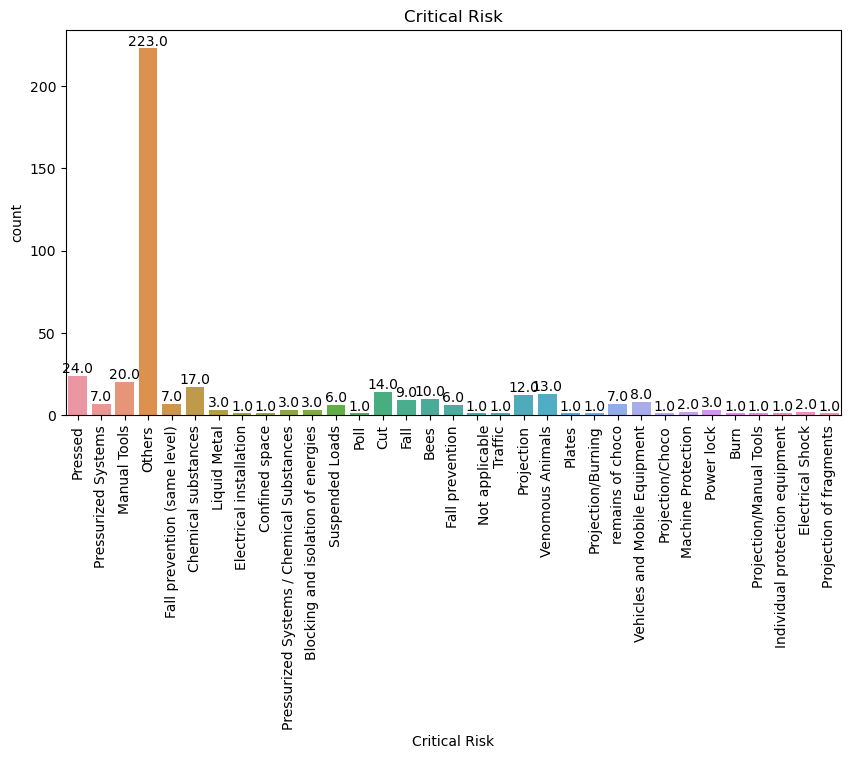

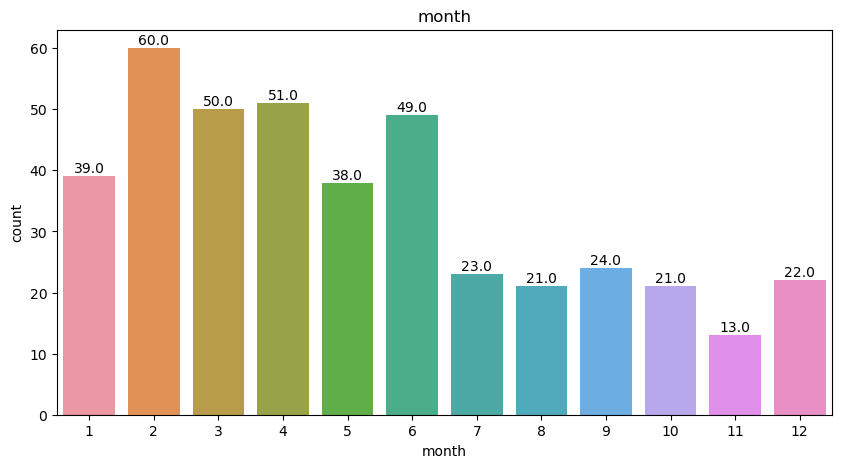

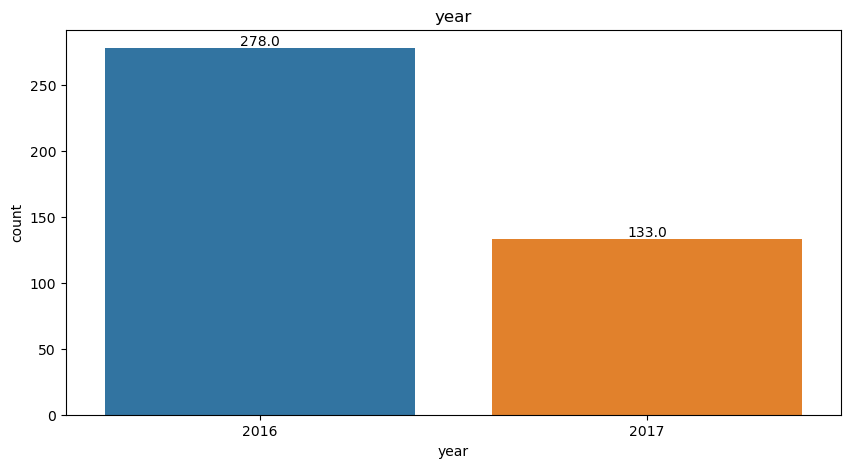

In [38]:
for col_name in data.columns:
    if(col_name!='Date' and col_name!='Description'):
        drawcountplot(col_name)

**Observations:**

1. Maximum accidents happened in Country_01.
2. Local_03 has recorded maximum number of accidents.
3. This is followed by Local-05, Local-01 and so on.
4. We can say that the number of accidents in Mining Industry is considerably more than that in the Metal Industry, therefore mining job is more risky than the latter.
5. Maximum accidents belongs to accident level I.
6. Maximum accidents belongs to potential accident level IV.
7. Maximum accidents happened for Male. 
8. Almost equal accidents happened for both Third Party and Employee. 
9. Most of the Critical Risks are classified as 'Others' that is almost 50% of the dataset, This is followed by Pressed, Manual tools, Chemical substances, Cut etc..
10. Maximum accidents happened in 2nd month which is February.
11. Maximum accidents happened in the year 2016 than 2017.


one-hot encoding:

One-hot encoding is a process used to convert categorical variables into a numerical format that can be provided to machine learning algorithms to improve model performance. For each unique category in the categorical variable, a new binary column is created. If an observation belongs to a particular category, the corresponding binary column is marked as 1, while all other binary columns are marked as 0. Here we are encoding columns 'Countries', 'Industry Sector','Gender', 'Employee or Third Party'

In [39]:
for col_name in data.columns:
    print(col_name)

Date
Countries
Local
Industry Sector
Accident Level
Potential Accident Level
Gender
Employee or Third Party
Critical Risk
Description
month
year


In [40]:
category_cols = ['Countries', 'Industry Sector','Gender', 'Employee or Third Party']
encoded_data = pd.get_dummies(data, columns=category_cols, dtype=int)

In [41]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 424
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Date                                          411 non-null    datetime64[ns]
 1   Local                                         411 non-null    object        
 2   Accident Level                                411 non-null    int64         
 3   Potential Accident Level                      411 non-null    int64         
 4   Critical Risk                                 411 non-null    object        
 5   Description                                   411 non-null    object        
 6   month                                         411 non-null    int32         
 7   year                                          411 non-null    int32         
 8   Countries_Country_01                          411 non-null    int64        

In [42]:
encoded_data.head()

,Date,Local,Accident Level,Potential Accident Level,Critical Risk,Description,month,year,Countries_Country_01,Countries_Country_02,Countries_Country_03,Industry Sector_Metals,Industry Sector_Mining,Industry Sector_Others,Gender_Female,Gender_Male,Employee or Third Party_Employee,Employee or Third Party_Third Party,Employee or Third Party_Third Party (Remote)
0,2016-01-01,Local_01,0,3,Pressed,While removing the drill rod of the Jumbo 08 f...,1,2016,1,0,0,0,1,0,0,1,0,1,0
1,2016-01-02,Local_02,0,3,Pressurized Systems,During the activation of a sodium sulphide pum...,1,2016,0,1,0,0,1,0,0,1,1,0,0
2,2016-01-06,Local_03,0,2,Manual Tools,In the sub-station MILPO located at level +170...,1,2016,1,0,0,0,1,0,0,1,0,0,1
3,2016-01-08,Local_04,0,0,Others,Being 9:45 am. approximately in the Nv. 1880 C...,1,2016,1,0,0,0,1,0,0,1,0,1,0
4,2016-01-10,Local_04,3,3,Others,Approximately at 11:45 a.m. in circumstances t...,1,2016,1,0,0,0,1,0,0,1,0,1,0


<font size='5'>Bi-variate Analysis</font>

Bivariate analysis is a statistical method used to examine the relationship between two variables. It helps to understand whether there is an association or correlation between the two variables.

In [43]:
def bivariate_analysis(x_col, hue_col, hue_order_col, data):
    plt.figure(figsize=(12,5))
    ax = sns.countplot(x=data[x_col], hue=data[hue_col], hue_order=data[hue_order_col].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

    total = sum(data[x_col].value_counts())
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), 
                    (p.get_x(), p.get_height()),
                    size=12,
                    xytext = (0, 3), 
                    textcoords = 'offset points')
    
    title=hue_col+" by "+x_col
    plt.title(title);
    plt.ylabel('Count');
    plt.legend(loc='upper right')

Generating bi-variate graphs of different features with Accident Level

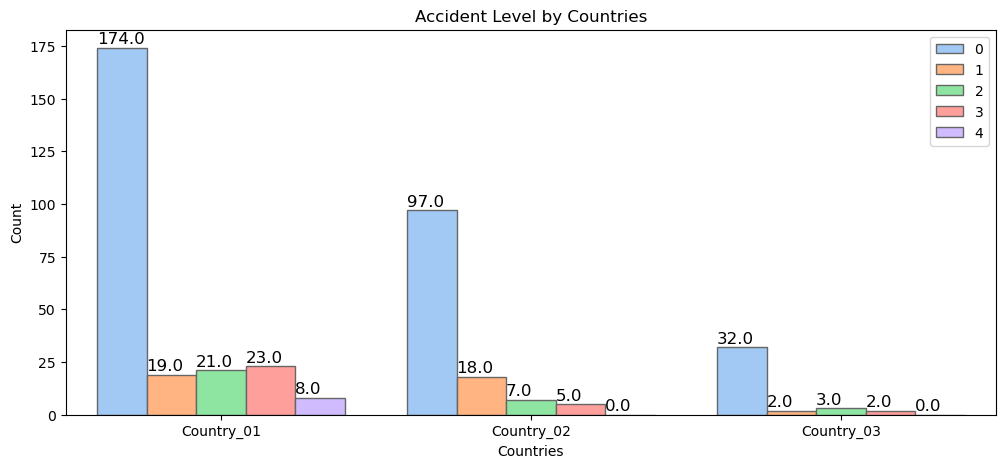

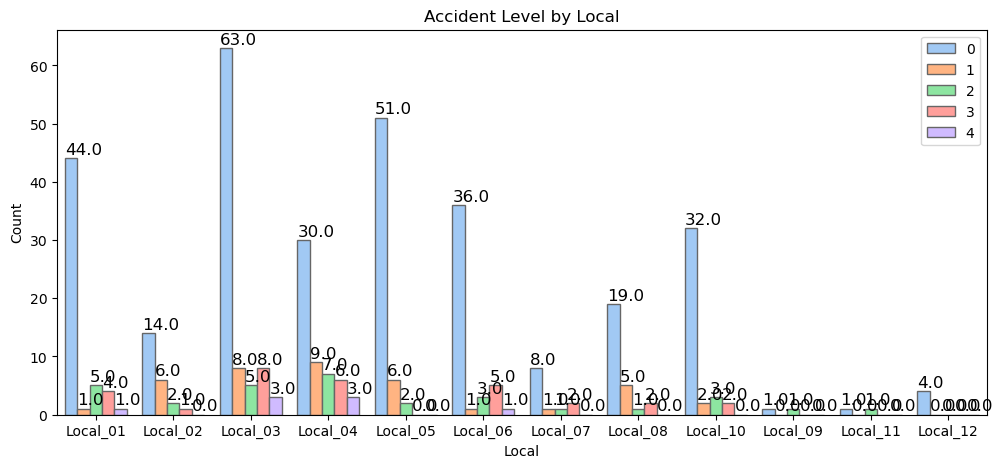

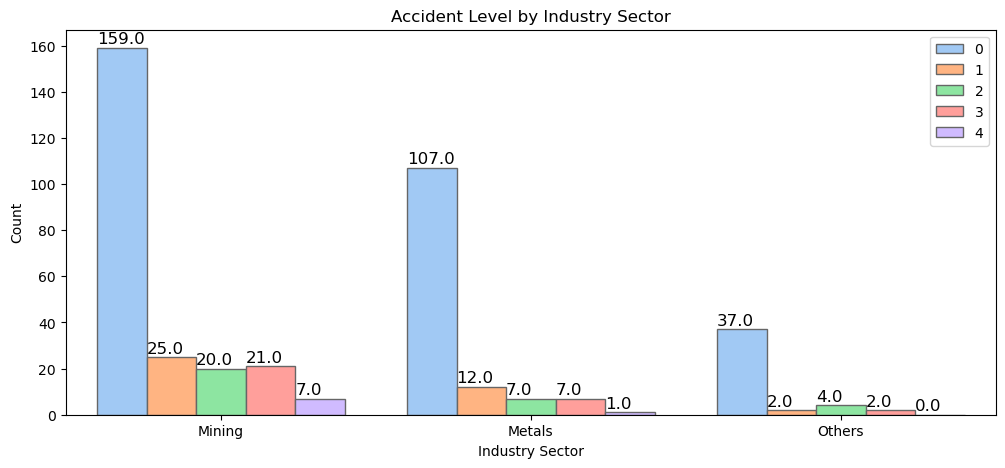

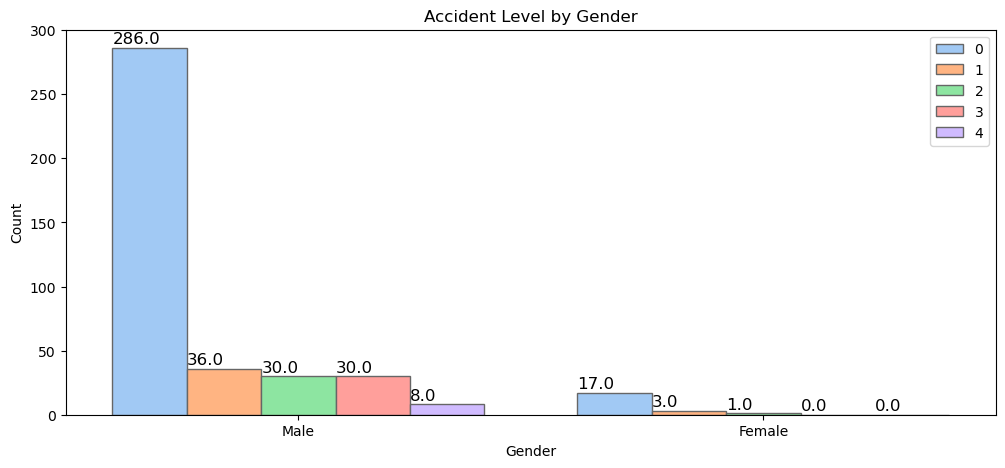

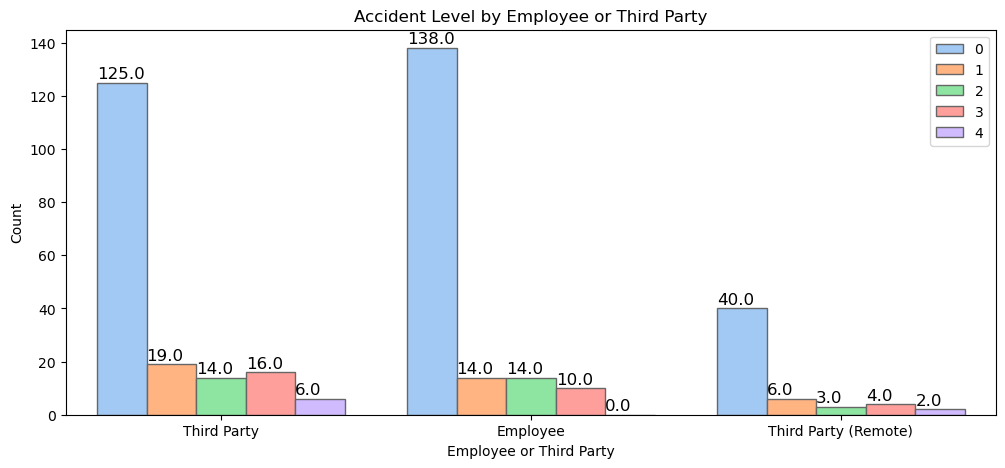

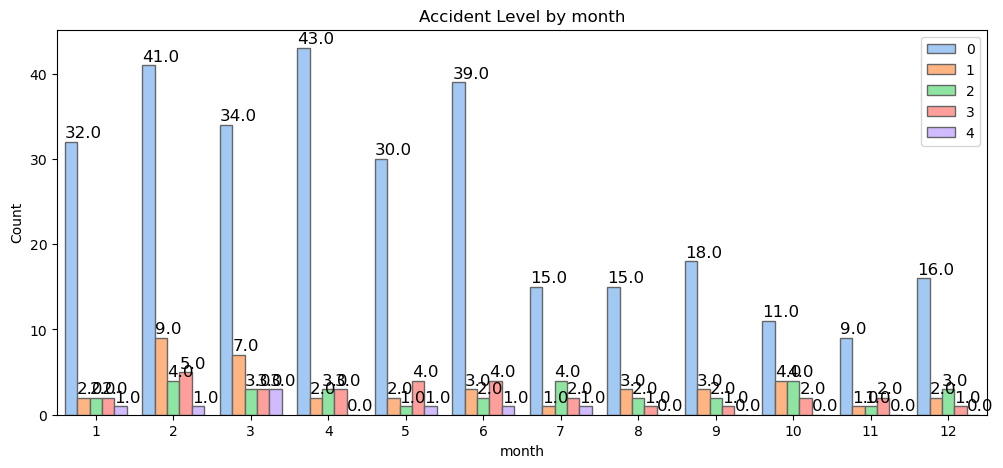

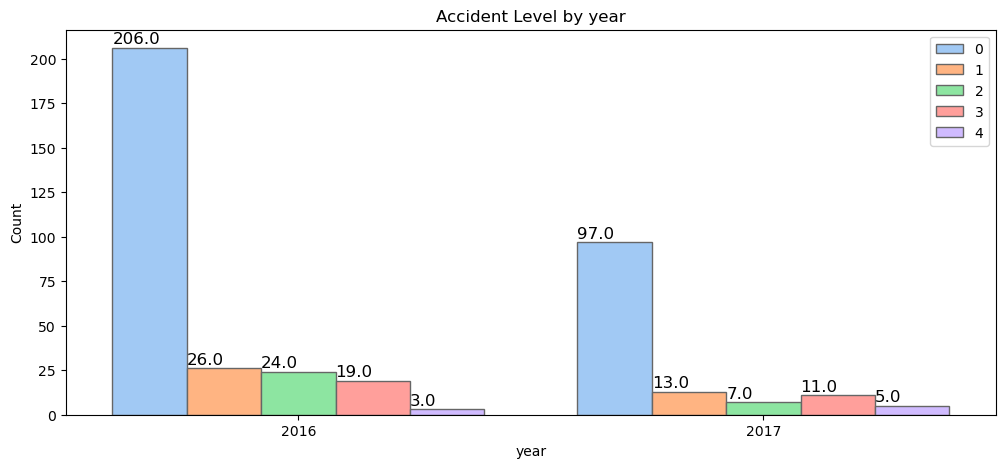

In [44]:
bi_variate_columns=['Countries', 'Local', 'Industry Sector', 'Gender', 'Employee or Third Party','month','year'   ]
for col_name in data.columns:
    if(col_name in bi_variate_columns):
        bivariate_analysis(col_name,'Accident Level', 'Accident Level', data )

Bi-variate analysis for Accident Levels by Critical Risk

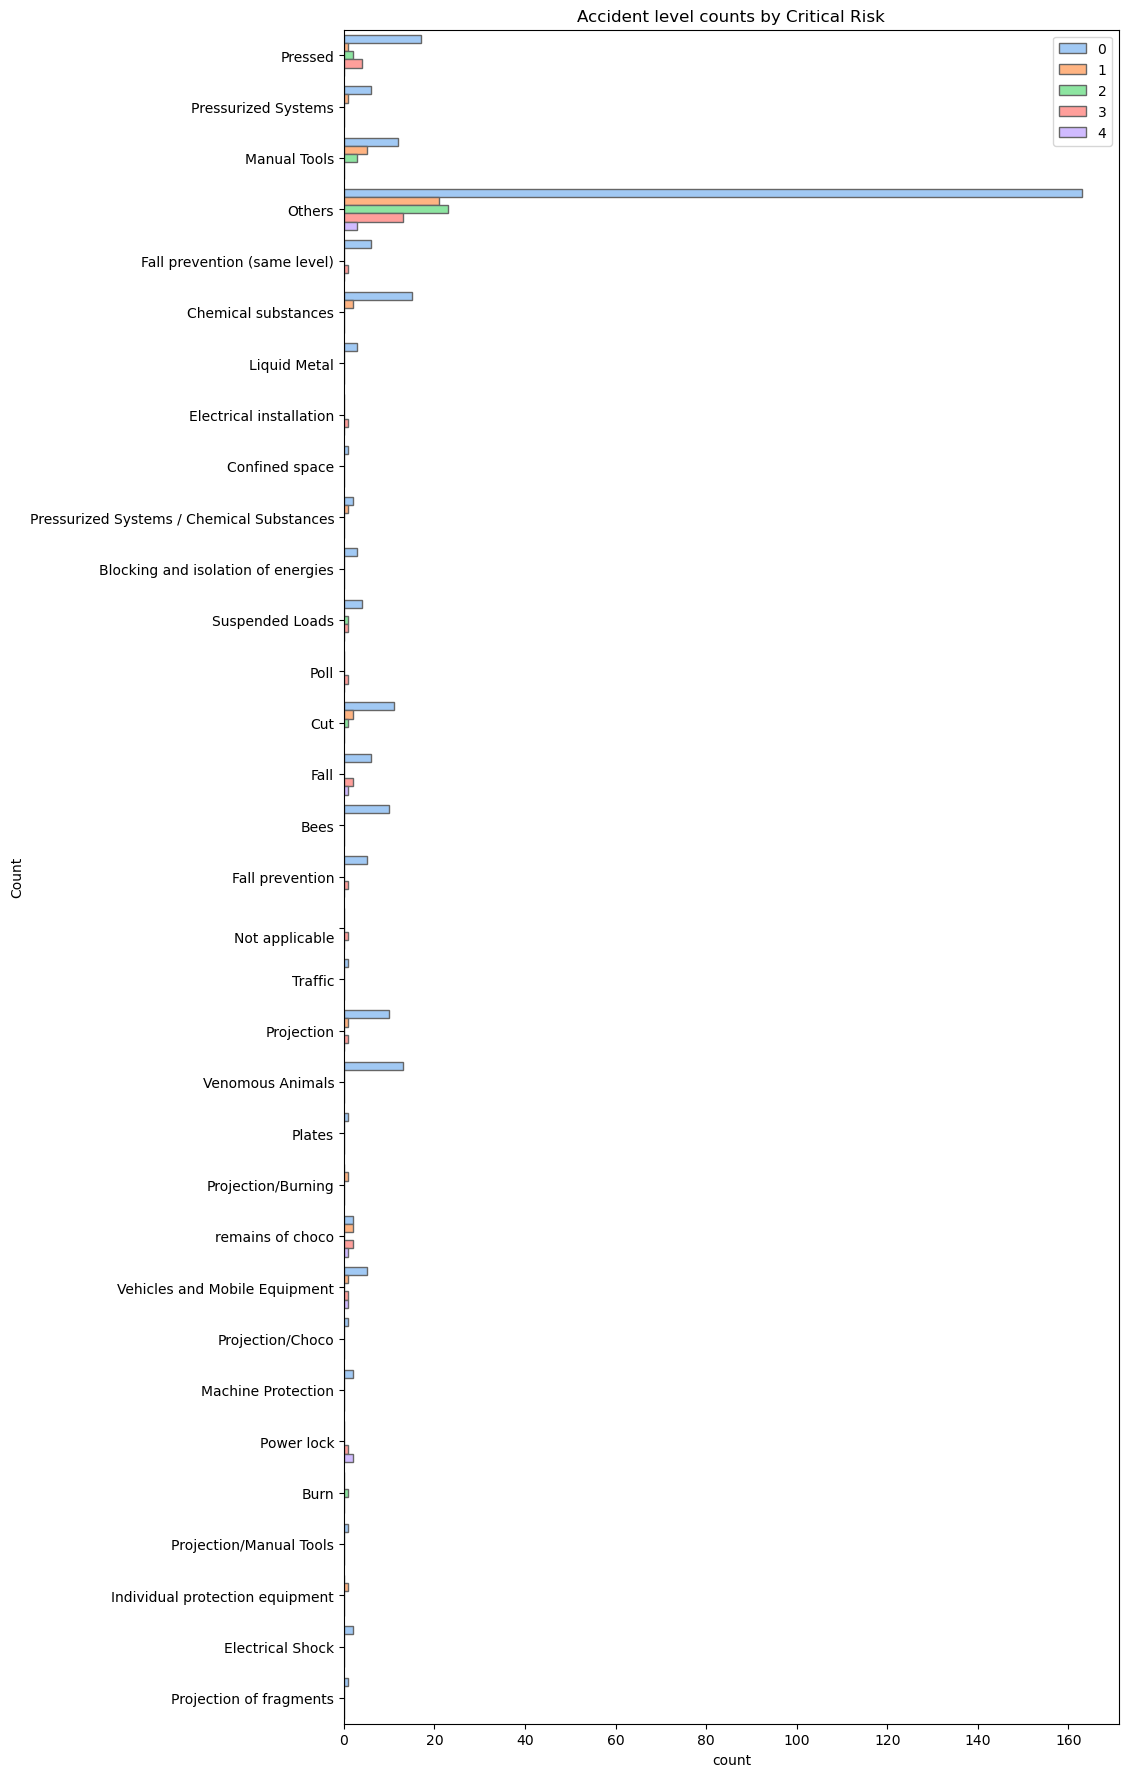

In [45]:
plt.figure(figsize=(10,22))
ax = sns.countplot(y = data['Critical Risk'], hue=data['Accident Level'], hue_order=data['Accident Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)
plt.title('Accident level counts by Critical Risk');
plt.ylabel('Count');
plt.legend(loc='upper right')

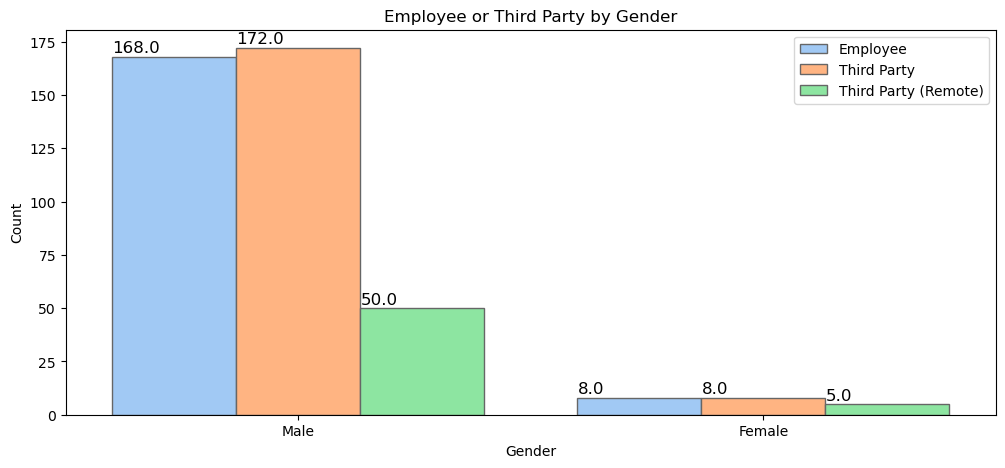

In [46]:
bivariate_analysis('Gender', 'Employee or Third Party','Employee or Third Party', data )

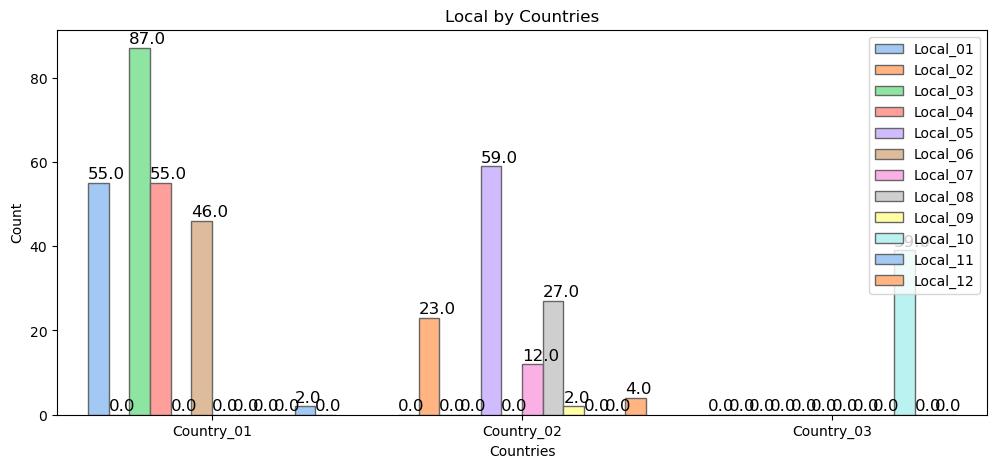

In [47]:
bivariate_analysis('Countries', 'Local','Local', data )

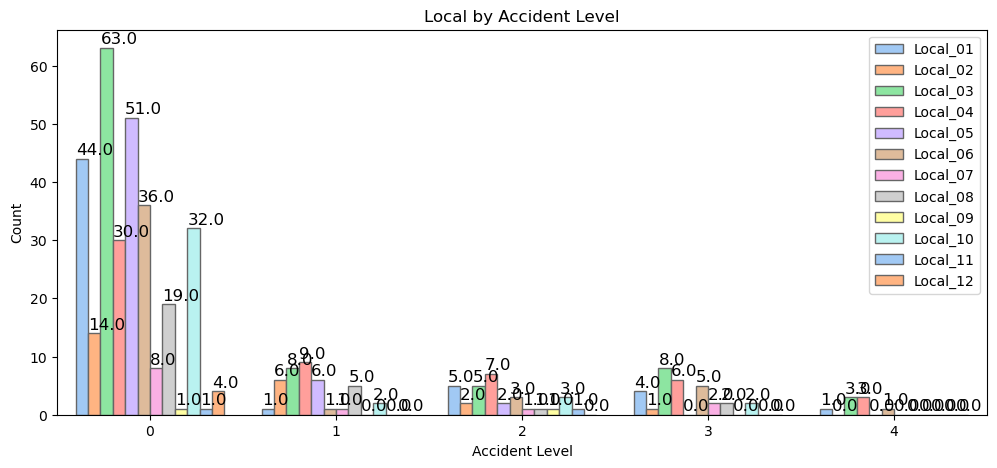

In [48]:
bivariate_analysis('Accident Level', 'Local','Local', data )

**Observations:**

1. We can observe that Country_01 has a higher number of accidents, while Country_03 has fewer accidents compared to Country_01 and Country_02.
Country_03 'level I' accidents counts is more compared to country_01 and country_02 but less severe accidents.
2. We can observe that most accidents occur in Local_03.
3. We can observe most accidents happen in the Mining Sector, while fewer accidents occur in other sectors.
4. We can observe that male employees have more accidents than female employees.
5. We can observe that fewer accidents happen with Third Party (Remote) compared to Employee and Third Party.
6. We can observe that more accidents occurred in the first six months.
7. We can observe that more accidents occurred in 2016 compared to 2017.
8. We can observe that there are more male Employees, Third Party workers, and Third Part (Remote) workers compared to female Employees, Third Party workers, and Third Part (Remote) workers.
9. We can see that In Country_01, maximum Type I accidents are happening in Local_03.

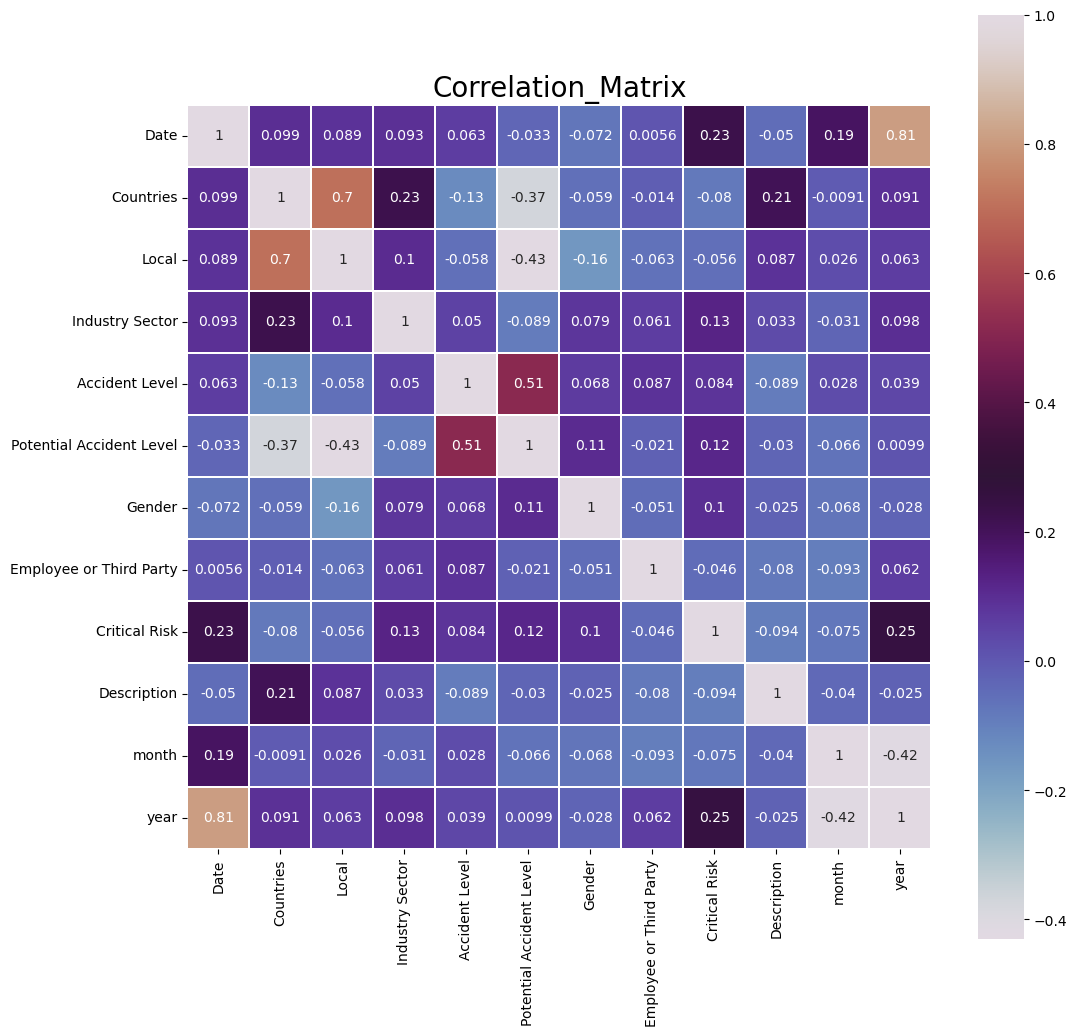

In [49]:
# Correlation
le = LabelEncoder()
df_enc = data.apply(le.fit_transform)

plt.figure(figsize=(12,12))
plt.title('Correlation_Matrix', fontsize=20)
sns.heatmap(df_enc.corr(), square=True, cmap='twilight', annot=True, linewidth=0.2);

**Observations:**

1. Country_01 has highest level IV accidents. 
2. Country_02 has moderate accidents across all the levels.
3. Country_03 has more accidents of 'level I' than other levels.
4. Local_03 (which also belongs to Country_01) is where most of the accidents happen
5. In Mining, IV and V category accidents are happening more than Metals industry. 
6. Countries & Locals are highly co-related. Accident Level & Potential Accident Levels are co-related but these correlation does not provide significant outcomes.

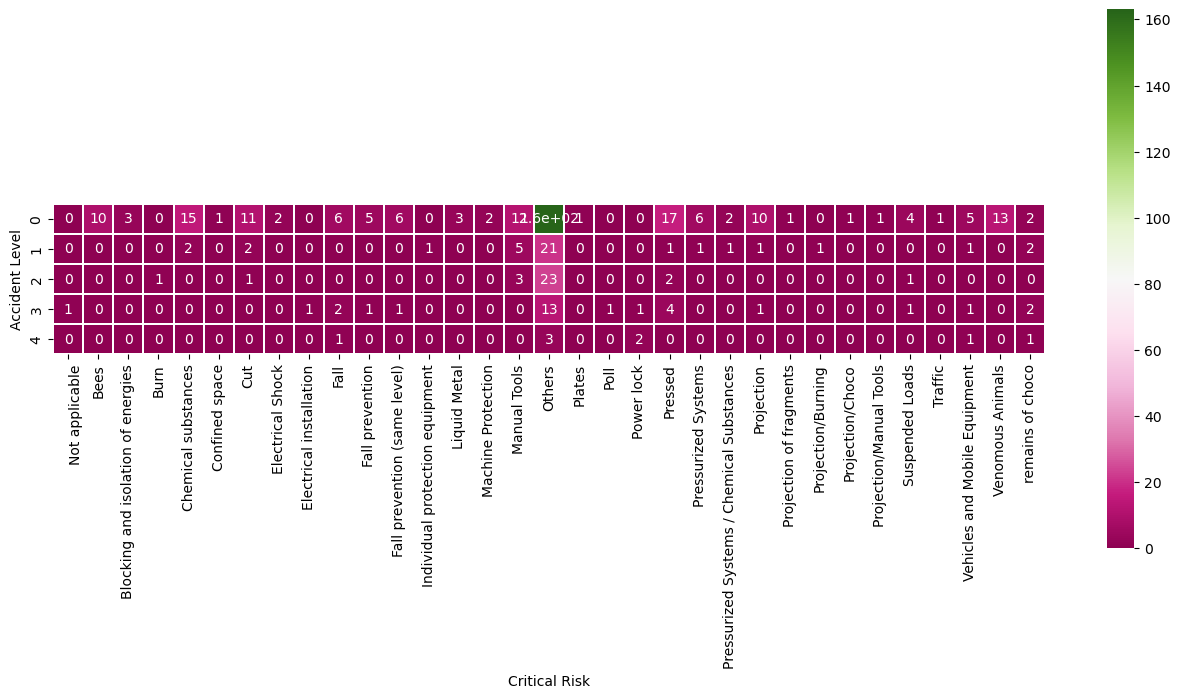

In [50]:
# Count of Accidents grouped by Accident Level and Potential accident level
plt.figure(figsize = (16,7))
sns.heatmap(pd.crosstab(data['Accident Level'], data['Critical Risk']), square=True, cmap='PiYG', annot=True, linewidth=0.1);

**Observations:**

1. There is not much correlation between both columns. It is difficult to draw exact conclusion from above. Reason is that Type I (0) is related with multiple potential accident level. 

Accident Levels by month

Text(0.5, 0, 'Month')

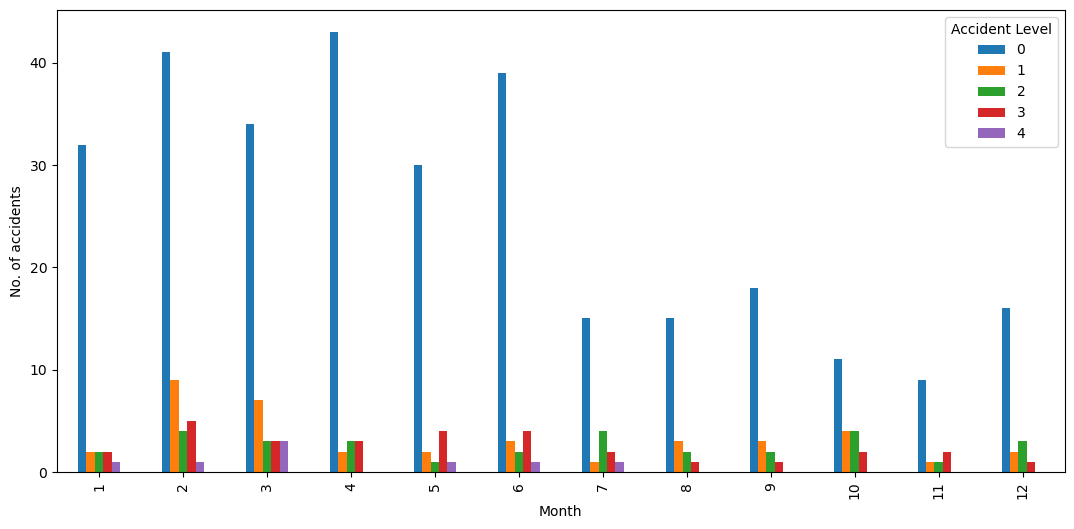

In [51]:
ct = pd.crosstab(columns=data['Accident Level'],index=data['month'])
ax = ct.plot(kind="bar",stacked=False,figsize=(13,6))
ax.set_ylabel('No. of accidents')
ax.set_xlabel('Month')

**Observations:**
1. Maximum accidents happened between 1st month to 6th month. 

<font size='5'>Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]</font>

There are following ways for Data preprocessing in NLP:

1. Text cleaning
2. Tokenization
3. Normalization (Stemming & Lemmatization)

In [52]:
data['Description']

0      While removing the drill rod of the Jumbo 08 f...
1      During the activation of a sodium sulphide pum...
2      In the sub-station MILPO located at level +170...
3      Being 9:45 am. approximately in the Nv. 1880 C...
4      Approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    Being approximately 5:00 a.m. approximately, w...
421    The collaborator moved from the infrastructure...
422    During the environmental monitoring activity i...
423    The Employee performed the activity of strippi...
424    At 10:00 a.m., when the assistant cleaned the ...
Name: Description, Length: 411, dtype: object

In [53]:
data['Description'][2]

'In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of \u200b\u200bthe left foot of the collaborator causing the injury.'

In [54]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{"couldn't", 'll', 'myself', "mustn't", 'down', 'weren', 'had', 'is', 'against', 'who', 'her', 'were', 'here', 'they', 'some', 'you', 'each', 'this', 'no', 'most', 'haven', 'such', 'there', 'further', 've', 'didn', 'at', 'it', 'then', 'other', 'don', 'shan', "should've", 'after', "shan't", 'whom', 'in', "hasn't", 'i', 'out', 'not', 'into', 'above', "needn't", 'my', "you've", 'own', 'we', 'am', 'm', 'will', 'off', "haven't", 'him', 'ours', 'but', 's', 'as', 'what', 'ma', 'for', 'yourself', 'was', 'himself', 'doing', 'which', 'be', 'won', 'isn', "wasn't", "you'll", 'has', 'do', 'than', 'few', "hadn't", "shouldn't", 'or', 'does', 'our', 'me', "didn't", 'before', 'again', 'should', "weren't", 'up', 'yourselves', 'have', "doesn't", 'to', 'nor', 'now', 'hadn', 'if', 'aren', 'that', 'having', 'those', 'can', 'hasn', 'how', 'only', 'once', 'wouldn', 'the', 'theirs', 'd', 'their', 'too', 'on', 'because', 'from', 'yours', 'its', 'a', 'same', 'she', 'themselves', 'are', 'over', 'so', 'herself', '

**Observations:**

1. Before applying the NLP data pre-processing techniques, we can see that the there are text in Capital letters and small letters. 
2. We can observe that there are many stop words used in the description like a, it, she etc.  

In [55]:
# Function to remove stop words (using for loop)
def remove_stopwords(text):
  tokens = text.split()
  filtered_words = [word for word in tokens if word not in stop_words]
  return ' '.join(filtered_words)

# Function to remove Punctuation
def remove_punctuation(x):
  exclude = set(string.punctuation)
  return ''.join(ch for ch in x if ch not in exclude)


# Function for nlp data pre processing
def nlpDataPreProcessing(dataframe, column):
    #lower case
    print("1. converting the description into lower case")
    dataframe[column]=dataframe[column].str.lower()
    #remove punctuation
    print("2. Removing punctuation from description")
    dataframe[column] = dataframe[column].apply(remove_punctuation)
    #remove stopwords
    print("3. Removing stop words")
    dataframe[column] = dataframe[column].apply(remove_stopwords)
    
# Lemmatization
def lemmatization(text):

    # Initialize the object for Lemmatizer class
    lemmatizer = nltk.stem.WordNetLemmatizer()

    # Set the stopwords to English
    stopwords = nltk.corpus.stopwords.words('english')

    # Normalize the text in order deal with accented words and unicodes
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Consider only alphabets and numbers from the text
    words = re.sub(r'[^a-zA-Z.,!?/:;\"\'\s]', '', text).split()

    # Consider the words which are not in stopwords of english and lemmatize them
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lems = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]

    # #remove non-alphabetical characters like '(', '.' or '!'
    # alphas = [i for i in lems if (i.isalpha() or i.isnumeric()) and (i not in stopwords)]

    words = [w for w in lems if len(w)>2]

    return words

In [56]:
nlpDataPreProcessing(data,'Description')

1. converting the description into lower case
2. Removing punctuation from description
3. Removing stop words


In [57]:
data['Description'].head()

0    removing drill rod jumbo 08 maintenance superv...
1    activation sodium sulphide pump piping uncoupl...
2    substation milpo located level 170 collaborato...
3    945 approximately nv 1880 cx695 ob7 personnel ...
4    approximately 1145 circumstances mechanics ant...
Name: Description, dtype: object

**Observations:**
1. Successfully converted the description into lower case. 
2. Successfully removed punctuation from Description. 
3. Successfully removed stop words from Description. 

Generating tokens from Description. These tokens will be used for generating 1-gram, 2-gram and n-gram.

In [58]:
#Generating tokens
tokens = lemmatization(' '.join(data['Description'].sum().split()))
print(tokens)

['removing', 'drill', 'rod', 'jumbo', 'maintenance', 'supervisor', 'proceeds', 'loosen', 'support', 'intermediate', 'centralizer', 'facilitate', 'removal', 'seeing', 'mechanic', 'support', 'one', 'end', 'drill', 'equipment', 'pull', 'hand', 'bar', 'accelerate', 'removal', 'moment', 'bar', 'slide', 'point', 'support', 'tightens', 'finger', 'mechanic', 'drilling', 'bar', 'beam', 'jumboactivation', 'sodium', 'sulphide', 'pump', 'piping', 'uncoupled', 'sulfide', 'solution', 'designed', 'area', 'reach', 'maid', 'immediately', 'made', 'use', 'emergency', 'shower', 'directed', 'ambulatory', 'doctor', 'later', 'hospital', 'note', 'sulphide', 'solution', 'gram', 'litersubstation', 'milpo', 'located', 'level', 'collaborator', 'excavation', 'work', 'pick', 'hand', 'tool', 'hitting', 'rock', 'flat', 'part', 'beak', 'bounce', 'hitting', 'steel', 'tip', 'safety', 'shoe', 'metatarsal', 'area', 'left', 'foot', 'collaborator', 'causing', 'injury', 'approximately', 'personnel', 'begin', 'task', 'unlocki

In [59]:
print('Length of all the words:', len(tokens),'\n')
print('Length of unique tokens in the dataset:', len(np.unique(tokens)),'\n')

Length of all the words: 12607 

Length of unique tokens in the dataset: 3015 



**Lemmatization:** [For Reference]

Lemmatization is used in natural language processing (NLP), machine learning, and chatbots. It groups together the inflected forms of a word so they can be analyzed as a single item. The base form, orlemma, identifies the word. For example, the verb "to walk" may appear as "walk", "walked", "walks", or "walking". The base form, "walk", is called thelemma for the word. 

Lemmatization is more accurate than stemming, but it's also more time consuming because it involves deriving the meaning of a word from something like a dictionary. 

Lemmatization links similar meaning words as one word, making tools such as chatbots and search engine queries more effective and accurate. For example, search engines like Google make use of lemmatization so that they can provide better, more relevant results to their users.

Applying Lemmatization on Description and adding a new column.

In [60]:
data['NewDescription'] = data.apply(lambda x: " ".join(lemmatization(x.Description)), axis=1)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 424
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      411 non-null    datetime64[ns]
 1   Countries                 411 non-null    object        
 2   Local                     411 non-null    object        
 3   Industry Sector           411 non-null    object        
 4   Accident Level            411 non-null    int64         
 5   Potential Accident Level  411 non-null    int64         
 6   Gender                    411 non-null    object        
 7   Employee or Third Party   411 non-null    object        
 8   Critical Risk             411 non-null    object        
 9   Description               411 non-null    object        
 10  month                     411 non-null    int32         
 11  year                      411 non-null    int32         
 12  NewDescription            4

Comparing Description & New Description post lemmatization

In [62]:
data['Description'][2]

'substation milpo located level 170 collaborator excavation work pick hand tool hitting rock flat part beak bounces hitting steel tip safety shoe metatarsal area \u200b\u200bthe left foot collaborator causing injury'

In [63]:
data['NewDescription'][2]

'substation milpo located level collaborator excavation work pick hand tool hitting rock flat part beak bounce hitting steel tip safety shoe metatarsal area left foot collaborator causing injury'

**Observations: [Comparing Description before & after Lemmatization]**

1. In the above comparison, you can see that the word "bounces" is changed to "bounce" and special characters like "\u200b\u200bthe" removed from description.

N-grams

In [64]:
# Function to calculate ngrams
def extract_ngrams(data, num):
  # Taking ngrams on Description column text and taking the value counts of each of the tokens
  words_with_count  = nltk.FreqDist(nltk.ngrams(data, num)).most_common(30) # taking top 30 most common words

  # Creating the dataframe the words and thier counts
  words_with_count = pd.DataFrame(words_with_count, columns=['Words', 'Count'])

  # Removing the brackets and commans
  words_with_count.Words = [' '.join(i) for i in words_with_count.Words]

  # words_with_count.index = [' '.join(i) for i in words_with_count.Words]
  words_with_count.set_index('Words', inplace=True) # setting the Words as index

  # Returns the dataframe which contains unique tokens ordered by their counts 
  return words_with_count

extracting 1 -gram
---------------------
          Count
Words          
causing     164
hand        155
left        153
right       153
operator    120
employee    108
time        102
moment       88
activity     87
worker       78
 
extracting 2 -gram
---------------------
                Count
Words                
left hand          60
time accident      54
right hand         48
causing injury     36
finger left        25
hand causing       15
fragment rock      15
injured person     15
finger right       14
medical center     14
 
extracting 3 -gram
---------------------
                          Count
Words                          
finger left hand             20
injury time accident         13
finger right hand            11
time accident employee        9
left hand causing             6
time accident worker          6
causing injury described      6
right hand causing            6
described time accident       6
worker wearing safety         5
 


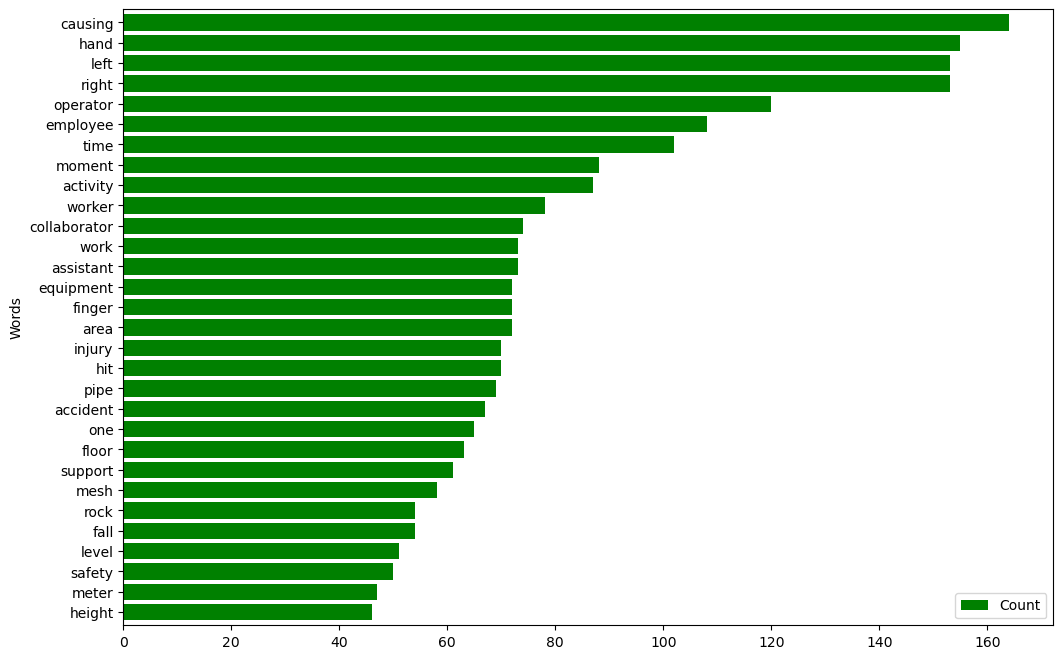

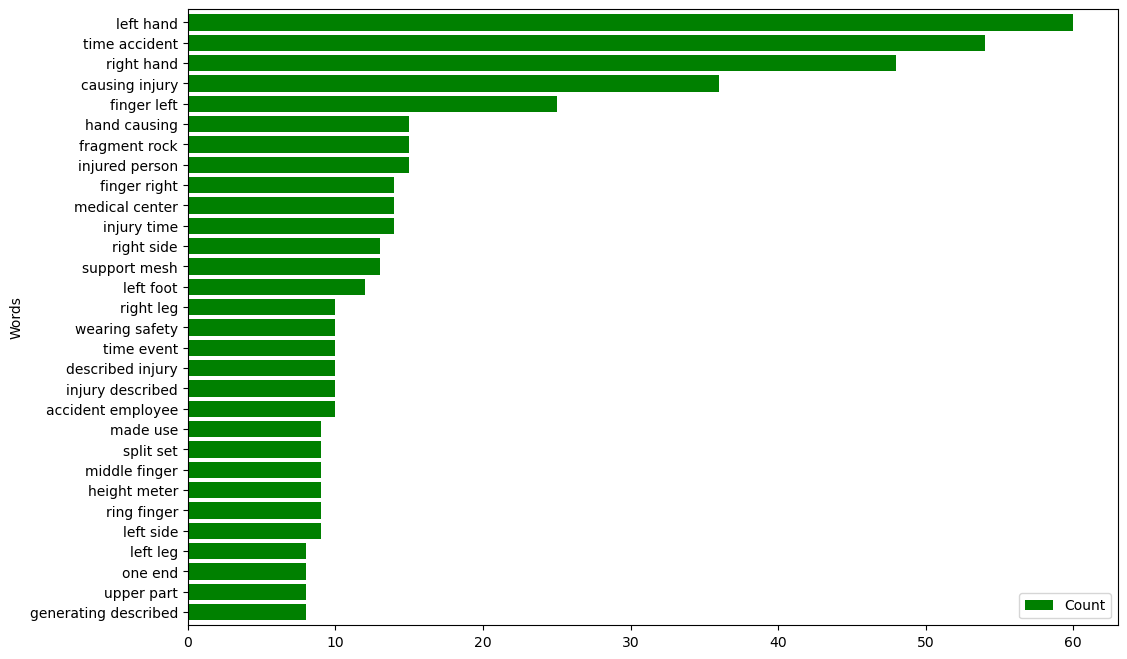

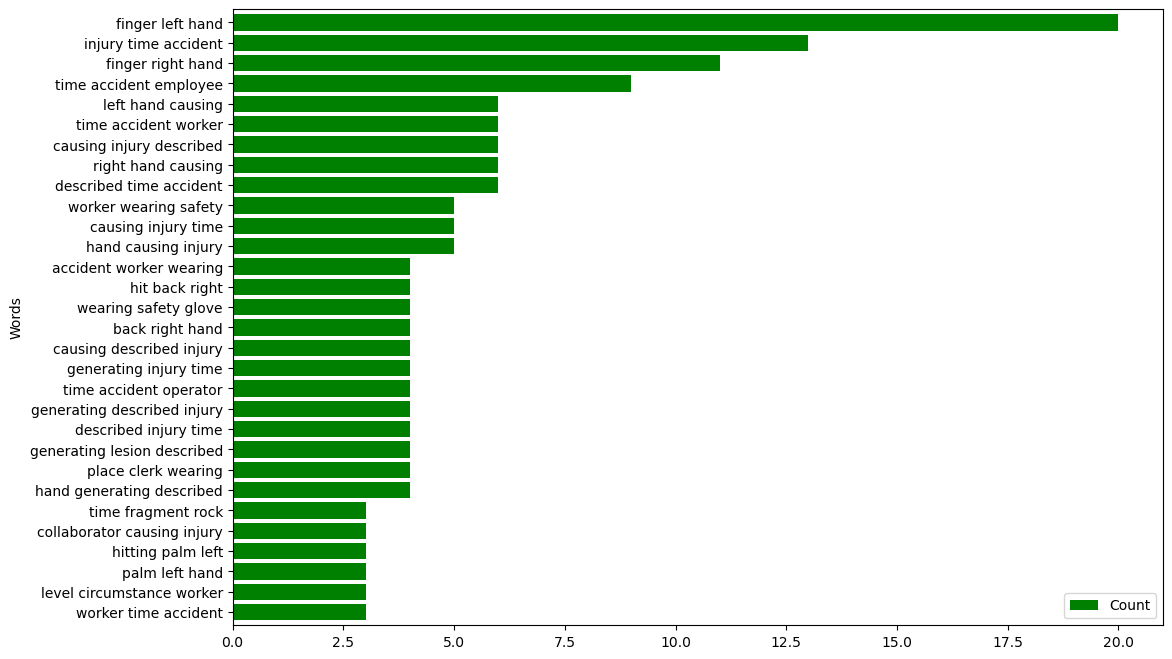

In [65]:
for i in range(1,4):
    print("extracting",i,"-gram")
    print("---------------------")
    # n-grams
    n_grams = extract_ngrams(tokens, i)
    print(n_grams[0:10])
    n_grams.sort_values(by='Count').plot.barh(color = 'green', width = 0.8, figsize = (12,8));
    print(" ")

**Observations:**
>1-gram (Uni-gram)

1. "Causing" is the most frequent word.
2. There are several nouns like pipe, collaborator, time etc.
3. Most accidents involved the hands of the persons involved.
4. Moreover there are other words which depict some sort of action (verbs). For example hit, remove, fall move...etc

> 2-gram (Bi-gram)

5. Most injuries involved hands as seen earlier.
6. There are many phrases which is related to hands. For example hand causing, left hand, right hand, finger left, finger right, middle finger and ring finger.
7. There are also some phrases which is related to other body parts. For example left foot and right side.

>3-gram (Tri-gram)

8. Like Unigram and Bigram, there are also many phrases which is related to hands or other body parts, but increasing the grams makes sense
9. For example left/right hand finger, left hand causing, hit back right and wearing safety glove.. etc.

In [66]:
# Dividing the tokens with respect to Industry Sector from the description text
tokens_metals = lemmatization(' '.join(data[data['Industry Sector']=='Metals']['Description'].sum().split()))
tokens_mining = lemmatization(' '.join(data[data['Industry Sector']=='Mining']['Description'].sum().split()))

In [67]:
print('Total number of words in Metals category:', len(tokens_metals))
print('Total number of words in Mining category:',len(tokens_mining))

Total number of words in Metals category: 2765
Total number of words in Mining category: 7996


In [68]:
# Extracting unigrams on metals category
unigrams_metals = extract_ngrams(tokens_metals, 1).reset_index()

# Extracting unigrams on mining category
unigrams_mining = extract_ngrams(tokens_mining, 1).reset_index()

unigrams_metals.join(unigrams_mining, lsuffix='_Metals', rsuffix='_Mining')

,Words_Metals,Count_Metals,Words_Mining,Count_Mining
0,left,46,hand,106
1,causing,43,causing,103
2,right,37,right,102
3,hand,36,operator,100
4,employee,33,left,93
5,hit,27,time,88
6,activity,27,worker,66
7,medical,24,assistant,65
8,report,23,equipment,63
9,area,21,accident,63


Ngram with Gender column

In [69]:
# Dividing the tokens of male and female category from the description text
tokens_male = lemmatization(' '.join(data[data.Gender=='Male']['Description'].sum().split()))
tokens_female = lemmatization(' '.join(data[data.Gender=='Female']['Description'].sum().split()))

In [70]:
print('Total number of words in Male category:', len(tokens_male))
print('Total number of words in Female category:',len(tokens_female))

Total number of words in Male category: 12244
Total number of words in Female category: 364


In [71]:
# Extracting unigrams on male category
unigrams_male = extract_ngrams(tokens_male, 1).reset_index()

# Extracting unigrams on female category
unigrams_female = extract_ngrams(tokens_female, 1).reset_index()

# Joining both the dataframes
uni_male_female = unigrams_male.join(unigrams_female, lsuffix='_Male', rsuffix='_Female')

#------------------------------------------------------------------------------------------

# Extracting bigrams on male category
bigrams_male = extract_ngrams(tokens_male, 2).reset_index()

# Extracting unigrams on female category
bigrams_female = extract_ngrams(tokens_female, 2).reset_index()

# Joining both the dataframes
bi_male_female = bigrams_male.join(bigrams_female, lsuffix='_Male', rsuffix='_Female')
print(bi_male_female)

              Words_Male  Count_Male        Words_Female  Count_Female
0              left hand          58          pump house             2
1          time accident          54         nitric acid             2
2             right hand          48           left hand             2
3         causing injury          35        step causing             2
4            finger left          24   cleaning activity             2
5          fragment rock          15     due overheating             1
6         injured person          15     overheating bar             1
7           hand causing          14             bar row             1
8           finger right          14            row cell             1
9         medical center          14          cell spark             1
10           injury time          14      spark produced             1
11            right side          13  produced projected             1
12          support mesh          13   projected manages             1
13    

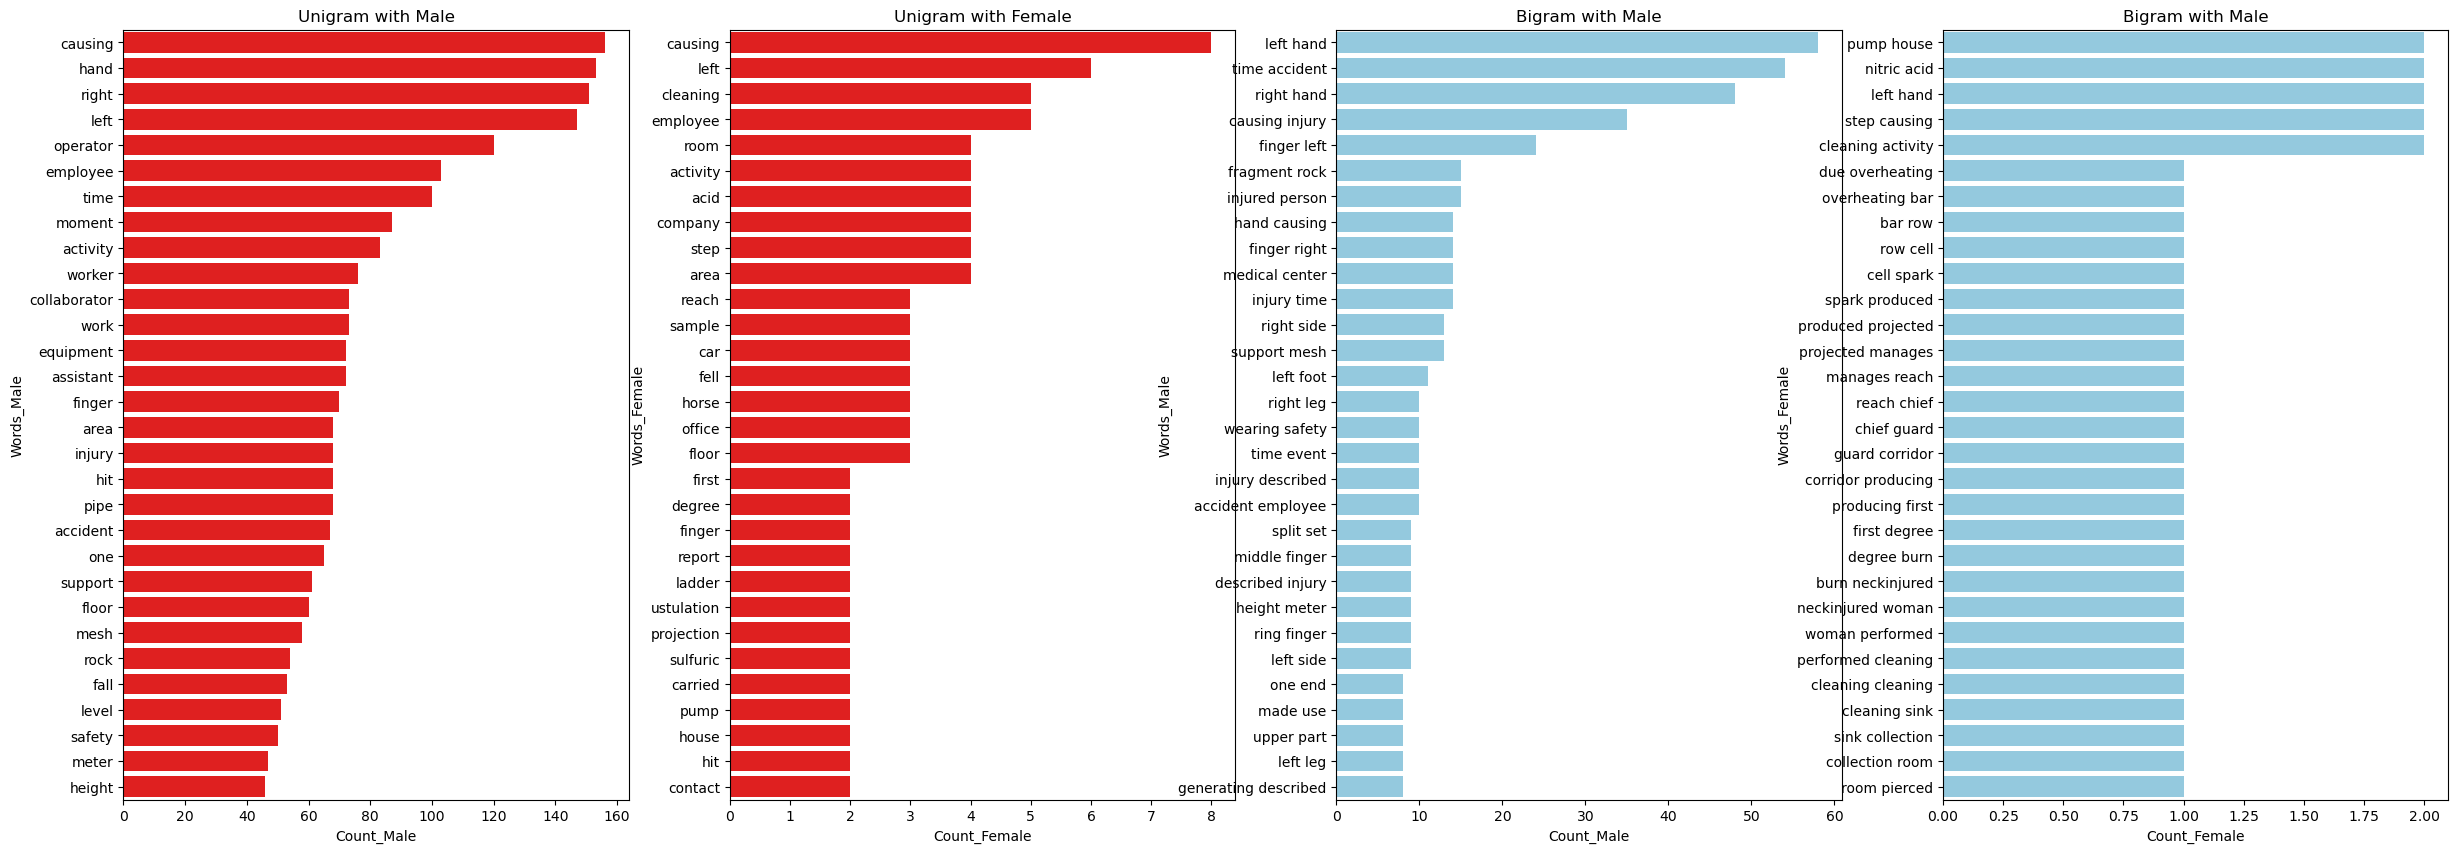

In [72]:
fig, axes = plt.subplots(1,4, figsize=(30, 10))

sns.barplot(y = uni_male_female['Words_Male'], x = uni_male_female['Count_Male'], ax=axes[0], color='red');
axes[0].set_title('Unigram with Male');

sns.barplot(y = uni_male_female['Words_Female'], x = uni_male_female['Count_Female'], ax=axes[1], color='red');
axes[1].set_title('Unigram with Female');

sns.barplot(y = bi_male_female['Words_Male'], x = bi_male_female['Count_Male'], ax=axes[2], color='skyblue');
axes[2].set_title('Bigram with Male');

sns.barplot(y = bi_male_female['Words_Female'], x = bi_male_female['Count_Female'], ax=axes[3], color='skyblue');
axes[3].set_title('Bigram with Male');

Word Cloud

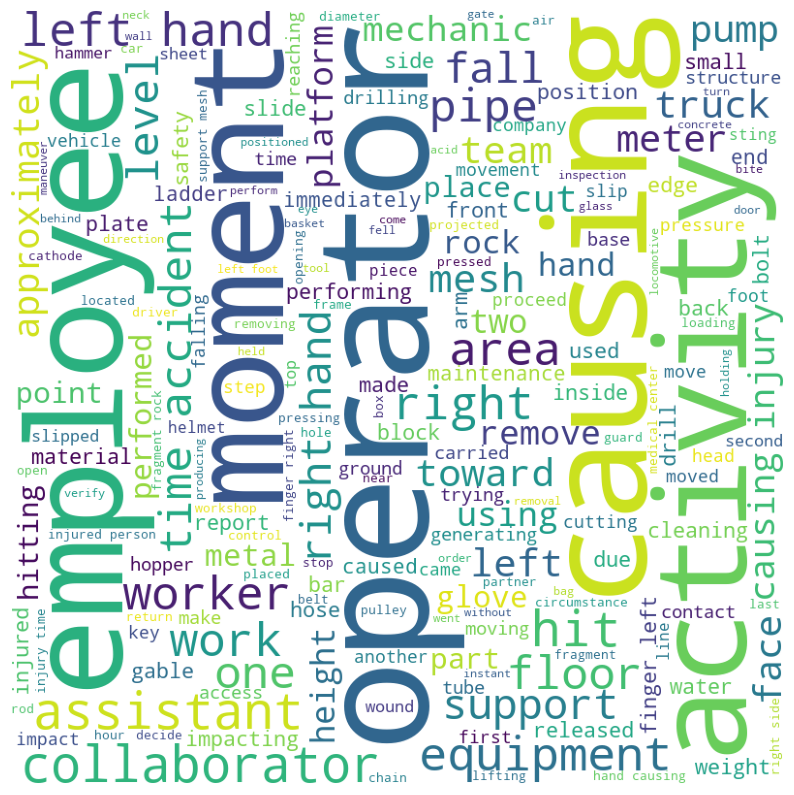

In [73]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(lemmatization(' '.join(data['Description'].sum().split()))))

plt.figure(figsize = (10, 15), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
  
plt.show()

**Observations:**

1. As same as the Ngram analysis above, there are many hand-related and movement-related words.
2. Hand-related: left, right, hand, finger, and glove
3. Movement-related: fall, hit, carry, lift and slip

In [74]:
blob = TextBlob(str(data['NewDescription']))
pos_data = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_data = pos_data.pos.value_counts()[:20]
pos_data.head()

pos
NN     35
CD     11
JJ      8
VBG     5
RB      5
Name: count, dtype: int64

<Axes: ylabel='pos'>

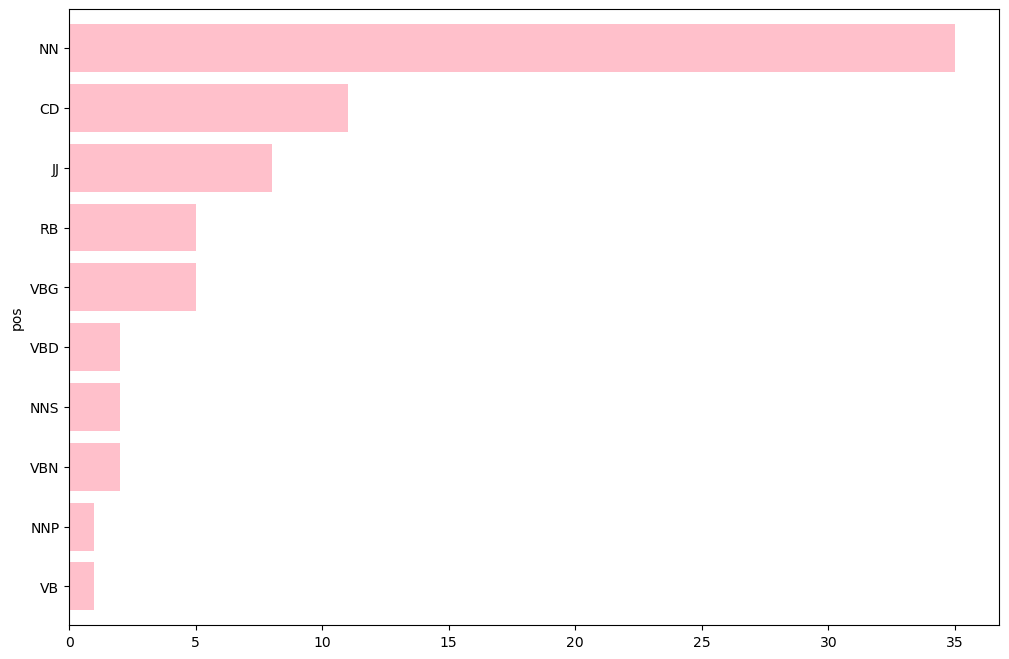

In [75]:
pos_data.sort_values().plot.barh(color = 'pink', width = 0.8, figsize = (12,8))

Some Examples:

NN - noun

NNP - proper noun

NNS - noun plural

CD - cardinal digit

DT - determiner

VB - verb

JJ - adjective

RB - adverb

VB - verb

VBD - verb past tense...etc

<font size="5">Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]</font>

In [110]:
# determining the name of the file
file_name = 'industrial_safety_data.xlsx'

# saving the excel
data.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


<font size="5">Step 5: Design train and test basic machine learning classifiers [ 10 Points ]</font>

<font size="5">Generating X & y using TfidfVectorizer()</font>

In [76]:
# Load the data

# Convert `accident_level` to numerical using LabelEncoder
label_encoder = LabelEncoder()
data['Accident Level'] = label_encoder.fit_transform(data['Accident Level'])

# Vectorize the `des_new` column using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['NewDescription'])

# `y` is the `accident_level` column
y = data['Accident Level']

<font size="5">Splitting the data into train, temp, test & validation</font>

In [77]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<font size="5">Random Forest</font>

In [78]:
# Train the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_clf.predict(X_train)
y_val_pred = rf_clf.predict(X_val)
y_test_pred = rf_clf.predict(X_test)

<font size="5">Training Set</font>

Training Set - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00         4

    accuracy                           1.00       287
   macro avg       1.00      1.00      1.00       287
weighted avg       1.00      1.00      1.00       287


Training Set - Confusion Matrix:


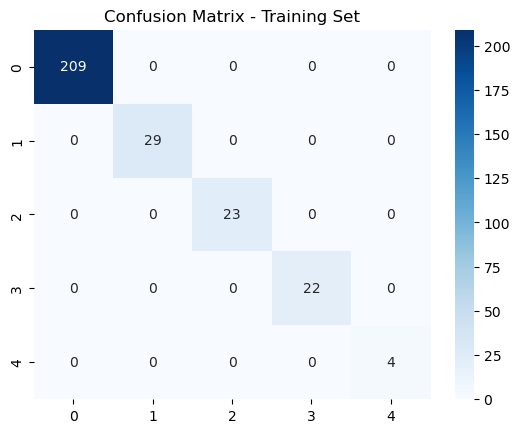

In [79]:
# Classification report and confusion matrix for the training set
print("Training Set - Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTraining Set - Confusion Matrix:")
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.show()

<font size="5">Validation Set </font>

Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        44
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.71        62
   macro avg       0.14      0.20      0.17        62
weighted avg       0.50      0.71      0.59        62


Validation Set - Confusion Matrix:


/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


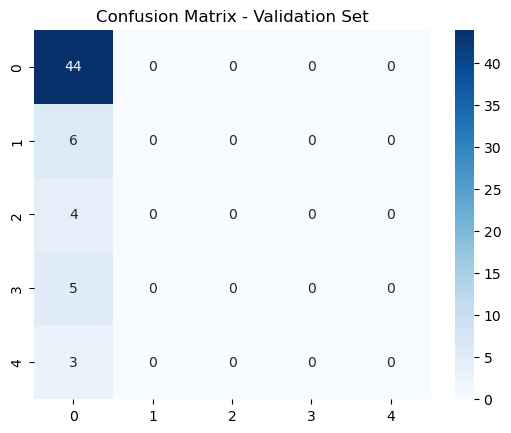

In [80]:
# Classification report and confusion matrix for the validation set
print("Validation Set - Classification Report:")
print(classification_report(y_val, y_val_pred))
print("\nValidation Set - Confusion Matrix:")
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.show()

<font size="5">Test Set</font>

Test Set - Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        50
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.81        62
   macro avg       0.16      0.20      0.18        62
weighted avg       0.65      0.81      0.72        62


Test Set - Confusion Matrix:


/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


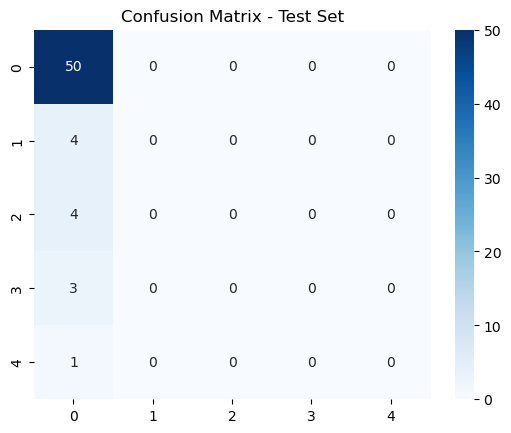

In [81]:
# Classification report and confusion matrix for the test set
print("Test Set - Classification Report:")
print(classification_report(y_test, y_test_pred))
print("\nTest Set - Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

**Training Set:**
Performance: The model achieved a perfect accuracy (1.00) on the training set, with precision, recall, and F1-score all equal to 1.00 across all classes.

Interpretation: This perfect performance is a sign that the model may have overfit the training data. Overfitting occurs when a model learns not only the patterns in the data but also the noise, resulting in excellent performance on the training set but potentially poor generalization to new data.

**Validation Set:**
Performance: The model performs poorly on the validation set, with an accuracy of 0.71. Precision, recall, and F1-scores are low across all classes except for class 0.

Interpretation: The low performance on the validation set, especially in classes 1 through 4, indicates that the model may be overfitting the training data and failing to generalize well to unseen data. The model heavily favors class 0, resulting in poor predictions for the other classes.

**Test Set:**
Performance: Similar to the validation set, the model's accuracy on the test set is 0.81, which is decent. However, the performance across classes is uneven, with high performance for class 0 and very low performance for classes 1 through 4.

Interpretation: The uneven performance and lack of predictive power in classes 1 through 4 suggest the model is biased towards class 0 and struggles with the other classes. This could be due to an imbalanced dataset or overfitting.

<font size="5">Random Forest with Grid Search CV</font>

In [82]:
# Define the Random Forest model
rf_clf = RandomForestClassifier(class_weight="balanced",random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [10,20,30,40],
    'max_depth': [None, 4, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "max_features": ["sqrt", 0.5, 0.7],
}

scorer = make_scorer(recall_score, average='weighted')

# Set up the GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val)

/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in 

/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/met

<font size="5">Validation Set</font>

/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        44
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.71        62
   macro avg       0.14      0.20      0.17        62
weighted avg       0.51      0.71      0.59        62


Validation Set - Confusion Matrix:


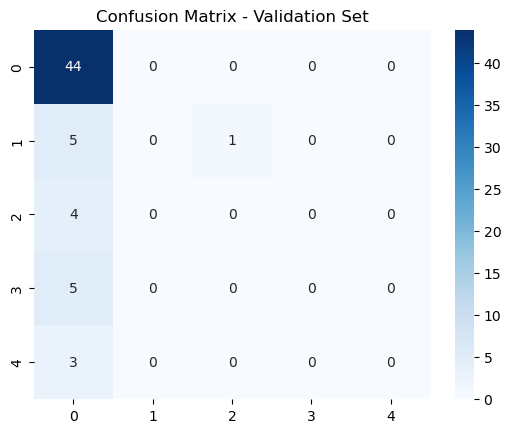

Best hyperparameters found by GridSearchCV:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}


In [83]:
# Print the classification report for the validation set
print("Validation Set - Classification Report:")
print(classification_report(y_val, y_val_pred))

# Plot the confusion matrix for the validation set
print("\nValidation Set - Confusion Matrix:")
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.show()

# Retrieve the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

**Observations:**

1. Best hyperparameters found by GridSearchCV are as follows:

max_depth=None,

max_features=sqrt,

min_samples_leaf=1,

min_samples_split=2,

n_estimators=10

<font size="5">XGBoost</font>

In [87]:
# Define the Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the grid of hyperparameters to search
# param_grid = {
#     'n_estimators': [50, 100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 2, 4]
# }

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val)

/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


<font size="5">Test Set</font>


Test Set - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        50
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.76        62
   macro avg       0.16      0.19      0.17        62
weighted avg       0.65      0.76      0.70        62


Test Set - Confusion Matrix:


/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


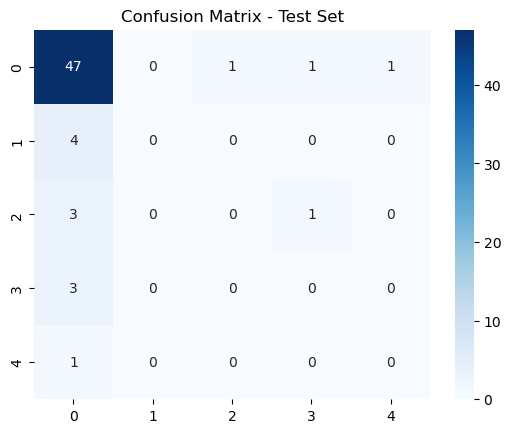

In [88]:
# Evaluate the model on the test set
y_test_pred = best_model.predict(X_test)
print("\nTest Set - Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\nTest Set - Confusion Matrix:")
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

<font size="5">Training Set</font>

Training Set - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00         4

    accuracy                           1.00       287
   macro avg       1.00      1.00      1.00       287
weighted avg       1.00      1.00      1.00       287


Training Set - Confusion Matrix:


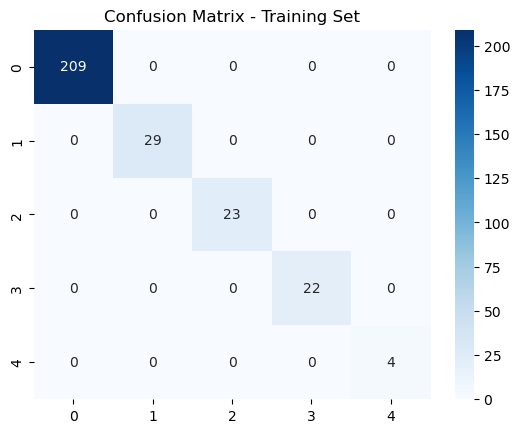

In [89]:
# Evaluate the model on the training set
y_train_pred = best_model.predict(X_train)
print("Training Set - Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTraining Set - Confusion Matrix:")
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.show()

<font size="5">Validation Set</font>


Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        44
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.68        62
   macro avg       0.14      0.19      0.16        62
weighted avg       0.51      0.68      0.58        62


Validation Set - Confusion Matrix:


/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


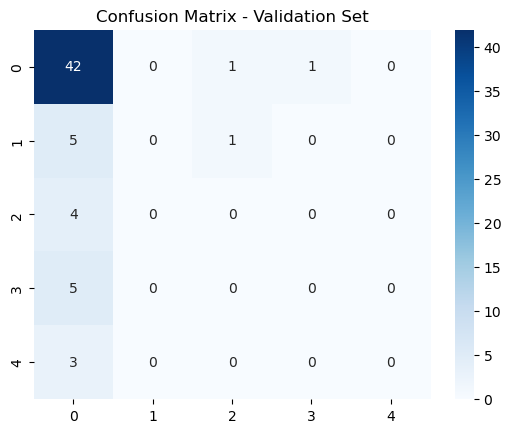

In [90]:
# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val)
print("\nValidation Set - Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nValidation Set - Confusion Matrix:")
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.show()

In [91]:
# Retrieve the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

Best hyperparameters found by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


<font size="5">SVM</font>

In [92]:
# Define the SVM model
svm_clf = SVC(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] if 'rbf' in ['linear', 'rbf', 'poly'] else [1],
    'degree': [2, 3] if 'poly' in ['linear', 'rbf', 'poly'] else [3]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


<font size="5">Test Set</font>


Test Set - Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        50
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.81        62
   macro avg       0.16      0.20      0.18        62
weighted avg       0.65      0.81      0.72        62


Test Set - Confusion Matrix:


/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


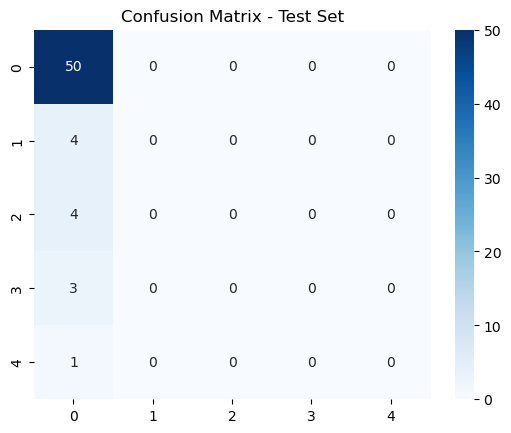

Best hyperparameters found by GridSearchCV:
{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [93]:
# Evaluate the model on the test set
y_test_pred = best_model.predict(X_test)
print("\nTest Set - Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\nTest Set - Confusion Matrix:")
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Retrieve the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

<font size="5">Training Set</font>

Training Set - Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       209
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00         4

    accuracy                           0.73       287
   macro avg       0.15      0.20      0.17       287
weighted avg       0.53      0.73      0.61       287


Training Set - Confusion Matrix:


/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


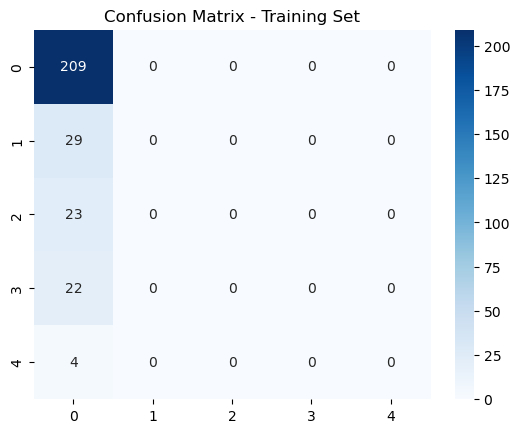

In [94]:
# Evaluate the model on the training set
y_train_pred = best_model.predict(X_train)
print("Training Set - Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTraining Set - Confusion Matrix:")
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.show()

<font size="5">Validation Set</font>


Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        44
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.71        62
   macro avg       0.14      0.20      0.17        62
weighted avg       0.50      0.71      0.59        62


Validation Set - Confusion Matrix:


/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


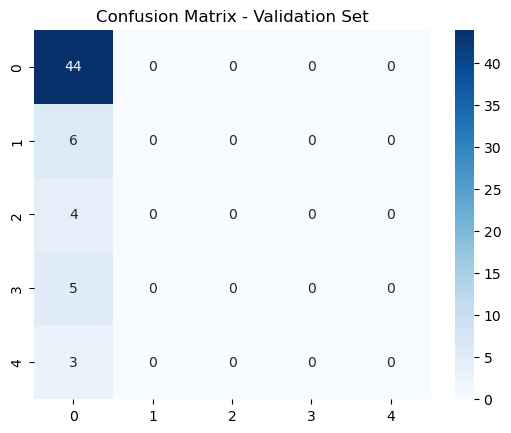

In [95]:
# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val)
print("\nValidation Set - Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nValidation Set - Confusion Matrix:")
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.show()

<font size="5">SMOTE ON RANDOM FOREST</font>

Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        44
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.61        62
   macro avg       0.14      0.17      0.15        62
weighted avg       0.48      0.61      0.54        62



/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


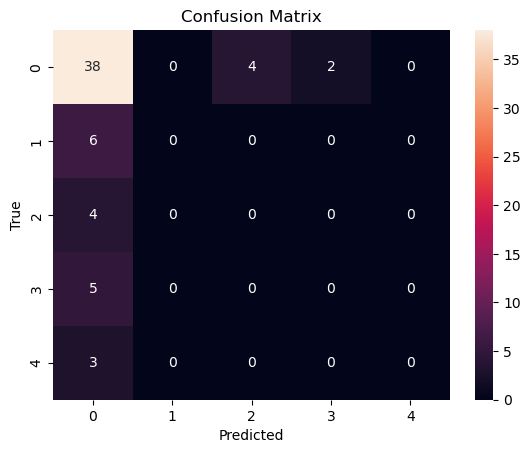

In [96]:
# Initialize SMOTE with k_neighbors set to 1
smote = SMOTE(random_state=42, k_neighbors=2)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define Random Forest model with best hyperparameters and class weights
rf_clf = RandomForestClassifier(
    max_depth=20,
    max_features=0.5,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=40,
    class_weight='balanced',  # Class weights set to 'balanced'
    random_state=42
)

# Train the model on the SMOTE-balanced training data
rf_clf.fit(X_train_balanced, y_train_balanced)

# Make predictions on the validation data
y_pred = rf_clf.predict(X_val)

# Evaluate the model using classification report and confusion matrix
print("Validation Set - Classification Report:")
print(classification_report(y_val, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

<font size="5">Test Set</font>


Test Set - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        50
           1       0.00      0.00      0.00         4
           2       0.33      0.50      0.40         4
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         1

    accuracy                           0.81        62
   macro avg       0.44      0.35      0.36        62
weighted avg       0.77      0.81      0.78        62


Test Set - Confusion Matrix:


/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


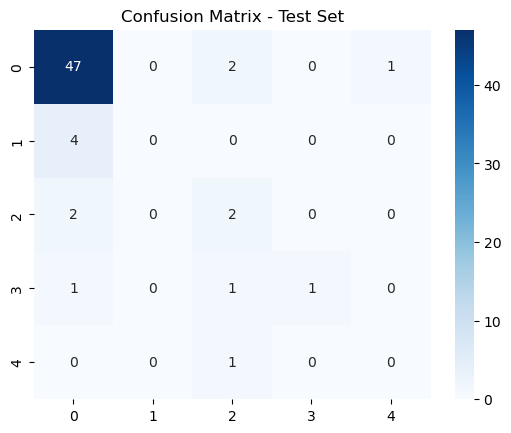

In [97]:
# Evaluate the model on the test set
y_test_pred = rf_clf.predict(X_test)
print("\nTest Set - Classification Report:")
print(classification_report(y_test, y_test_pred))

print("\nTest Set - Confusion Matrix:")
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

<font size="5">Training Set</font>

Training Set - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       209
           1       1.00      1.00      1.00        29
           2       0.95      0.91      0.93        23
           3       1.00      0.86      0.93        22
           4       1.00      1.00      1.00         4

    accuracy                           0.98       287
   macro avg       0.99      0.95      0.97       287
weighted avg       0.98      0.98      0.98       287


Training Set - Confusion Matrix:


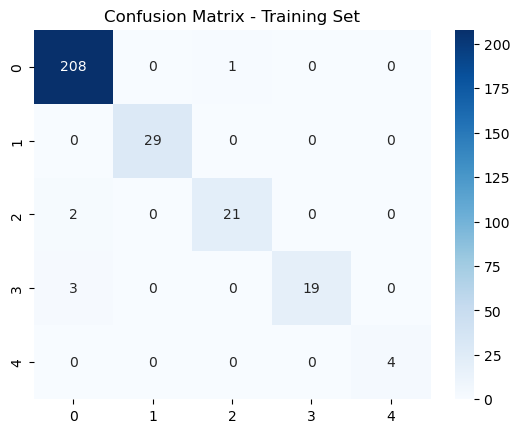

In [98]:
# Evaluate the model on the training set
y_train_pred = rf_clf.predict(X_train)
print("Training Set - Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTraining Set - Confusion Matrix:")
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.show()

In [99]:
X_train, X_test, y_train, y_test = train_test_split(data['NewDescription'], data['Accident Level'].values, test_size=0.2, random_state=42)

print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 328
Validation utterances: 83


<font size="5">Running models without SMOTE</font>

In [100]:
# Defining a function which quickly test the fit of 6 different models on the dataset
def ml_models(X_train , y_train, X_test, y_test):

    # creating a dictionary with different ML models
    models = {
        'LogReg': LogisticRegression(), 
        'Naive Bayes': GaussianNB(),        
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),          
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        'XGBoost': XGBClassifier()
    }
    
    names = []
    scores = []
    precisions = []
    f1_scores =[]
    train_accuracies = []
    test_accuracies = []
    
    for name, model in models.items(): # Looping through each and every model
        clf = model.fit(X_train, y_train) # Fit the models one by one
        result = clf.score(X_test,y_test) 
        
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        report = classification_report(y_train, y_train_pred)
        
        precision = precision_score(y_train, y_train_pred, average='weighted')
        f1 = f1_score(y_train, y_train_pred, average='weighted')
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

#         print("name=",name, "result=", result, "precision=",precision)
        names.append(name)
        scores.append(result) # Appending the test scores to the list
        precisions.append(precision)
        f1_scores.append(f1)
        test_accuracies.append(test_accuracy)
        
        result_df =  pd.DataFrame({'model': names, 'accuracy': scores, 'precision':precisions, 'f1-score': f1-scores, 'train_accuracies': train_accuracy, 'test_accuracies': test_accuracies }) # Creating the dataframe using the model scores

    return result_df # Returns the dataframe

In [101]:
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_a = vectorizer.fit_transform(X_train)
X_test_a = vectorizer.transform(X_test)

In [102]:
ml_models(X_train_a.toarray(), y_train, X_test_a.toarray(), y_test)

/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragsharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

,model,accuracy,precision,f1-score,train_accuracies,test_accuracies
0,LogReg,0.746988,1.000000,0.253012,1.0,0.746988
1,Naive Bayes,0.746988,1.000000,0.253012,1.0,0.746988
2,KNN,0.746988,0.539867,0.253012,1.0,0.746988
3,SVM,0.746988,0.877964,0.253012,1.0,0.746988
4,Decision Tree,0.698795,0.671789,0.301205,1.0,0.698795
5,RandomForest,0.746988,0.539867,0.253012,1.0,0.746988
6,Bagging,0.746988,0.946306,0.253012,1.0,0.746988
7,AdaBoost,0.734940,0.638341,0.265060,1.0,0.734940
8,Gradient Boost,0.722892,0.856098,0.277108,1.0,0.722892
9,XGBoost,0.722892,1.000000,0.277108,1.0,0.722892


**Observations:**

- Logistic Regression, Naive Bayes, SVM, RandomForest, Bagging, and KNN have an accuracy of around ~75%.
- Decision Tree has an accuracy of 69%.
- AdaBoost has the lowest accuracy of 62%.
- Models like Logistic Regression, Naive Bayes, SVM, Bagging, and RandomForest have high precision but low F1-score, indicating that they may have high false positives.
- Gradient Boost has the highest precision and XGBoost has the highest F1-score.
- All models perform similarly on the test set, with an accuracy of around 75%.

<font size="5">SMOTE</font>

SMOTE (Synthetic Minority Over-sampling Technique) is a method used to tackle **class imbalance** in classification tasks. 

It generates synthetic samples for the minority class by interpolating between existing instances, thus balancing the dataset. This technique enhances the performance of machine learning models by ensuring they learn from sufficient minority class examples. 

Key parameter k_neighbours determines the number of nearest neighbors used in generating synthetic samples. 

**SMOTE is widely used to improve model accuracy and reliability in scenarios with imbalanced data distributions.**

In [103]:
# Defining a function which quickly tests the fit of 6 different models on the dataset
def ml_models_with_SMOTE(X_train, y_train, X_test, y_test):

        # creating a dictionary with different ML models
    models = {
        'LogReg': LogisticRegression(), 
        'Naive Bayes': GaussianNB(),        
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),          
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        'XGBoost': XGBClassifier()
    }
    
    names = []
    scores = []
    precisions = []
    f1_scores = []
    train_accuracies = []
    test_accuracies = []

    for name, model in models.items():  # Looping through each model
        # Create an SMOTE instance (adjust k_neighbors if needed)
        smote = SMOTE(k_neighbors=2)  # Number of neighbors to consider for synthetic sample generation

        # Generate synthetic samples
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train.copy(), y_train.copy())
        
        # Fit the model with the resampled data
        clf = model.fit(X_train_resampled, y_train_resampled)
        result = clf.score(X_test, y_test)

        y_train_pred = clf.predict(X_train_resampled)
        y_test_pred = clf.predict(X_test)
        report = classification_report(y_train_resampled, y_train_pred)

        precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
        f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')
        train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        names.append(name)
        scores.append(result)
        precisions.append(precision)
        f1_scores.append(f1)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        result_df = pd.DataFrame({'model': names,
                              'accuracy': scores,
                              'precision': precisions,
                              'f1-score': f1_scores,
                              'train_accuracies': train_accuracies,
                              'test_accuracies': test_accuracies})

    return result_df

<font size="5">Model Comparison with SMOTE</font>

In [104]:
ml_models_with_SMOTE(X_train_a.toarray(), y_train, X_test_a.toarray(), y_test)

,model,accuracy,precision,f1-score,train_accuracies,test_accuracies
0,LogReg,0.493976,0.936695,0.930972,0.930290,0.493976
1,Naive Bayes,0.746988,0.782055,0.635737,0.666390,0.746988
2,KNN,0.084337,0.780129,0.640638,0.713693,0.084337
3,SVM,0.686747,0.892844,0.873756,0.874689,0.686747
4,Decision Tree,0.289157,0.719642,0.679951,0.683817,0.289157
5,RandomForest,0.638554,0.813552,0.788720,0.795851,0.638554
6,Bagging,0.445783,0.918818,0.903707,0.902905,0.445783
7,AdaBoost,0.228916,0.513684,0.391818,0.404149,0.228916
8,Gradient Boost,0.493976,0.847018,0.831649,0.829876,0.493976
9,XGBoost,0.590361,0.935757,0.928796,0.927801,0.590361


In [105]:
# def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
#     if report == "yes":
#         print(model)
#         print("***************************************************************************")

#     model.fit(X_train, y_train)  # Fit the model on Training set

#     if of_type == "coef":
#         # Intercept and Coefficients
#         print("The intercept for our model is", model.intercept_, "\n")
#         for idx, col_name in enumerate(X_train.columns):
#             print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

#     y_pred = model.predict(X_test)  # Predict on Test set

#     # Initialise mc_logloss
#     mc_logloss = 1.00
#     if method not in ['LogisticRegression', 'SVC'] and hasattr(model, 'predict_proba'):
#         y_predictions = model.predict_proba(X_test)
#     else:
#          y_predictions = model.predict(X_test)
    
#     train_accuracy_score = model.score(X_train, y_train)
#     test_accuracy_score = model.score(X_test, y_test)

#     precision_score_val = precision_score(y_test, y_pred, average='weighted')
#     recall_score_val = recall_score(y_test, y_pred, average='weighted')
#     f1_score_val = f1_score(y_test, y_pred, average='weighted')

#     if method not in ['LogisticRegression', 'SVC']:
#         mc_logloss = log_loss(y_test, y_predictions)

#     if report == "yes":
#         # Model - Confusion matrix
#         model_cm = confusion_matrix(y_test, y_pred)
#         sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels=["I", "II", "III", "IV", "V"], yticklabels=["I", "II", "III", "IV", "V"])
#         plt.ylabel('Actual')
#         plt.xlabel('Predicted')
#         plt.show()

#         # Model - Classification report
#         model_cr = classification_report(y_test, y_pred)
#         print(model_cr)

#     # Store the accuracy results for each model in a dataframe for final comparison
#     results_df = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score,
#                                'Precision': precision_score_val, 'Recall': recall_score_val, 'F1-Score': f1_score_val,
#                                'Multi-Class Logloss': mc_logloss}, index=[index])

#     # Save the model
#     if save_model == "yes":
#         filename = 'finalised_model.sav'
#         pickle.dump(model, open(filename, 'wb'))

#     return results_df  # return all the metrics along with predictions

In [108]:
# def gridsearch_allmodels(X_train_common, X_test_common, y_train, y_test, scale):
    
#     # Define classification models with their respective parameter grids
#     models = [
#         ['LogisticRegression', LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1), 
#          {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
#         ['DecisionTreeClassifier', DecisionTreeClassifier(criterion='gini', random_state=1), 
#          {'max_depth': [3, 5, 10]}],
#         ['RandomForestClassifier', RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1, verbose=2), 
#          {'n_estimators': [10, 15, 20]}],
#         ['SVC', SVC(kernel='rbf', probability=True), 
#          {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}],
#         ['GaussianNB', GaussianNB(), {}],  # No hyperparameters to tune for GaussianNB
#         ['KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5), 
#          {'n_neighbors': [2]}],
#         ['AdaBoostClassifier', AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1), 
#          {'n_estimators': [10, 15, 20], 'learning_rate': [0.01, 0.1, 0.5]}],
#         ['GradientBoostingClassifier', GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, random_state=1), 
#          {'n_estimators': [10, 15, 20], 'learning_rate': [0.01, 0.1, 0.5]}]
#     ]
    
#     all_gridResultsDf = pd.DataFrame()
    
#     for name, classifier, param_grid in models:
#         # Initialize GridSearchCV
#         grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=5)
        
#         # Train the model with hyperparameter tuning
#         grid_search.fit(X_train_common, y_train)
        
#         # Print the best parameters found by GridSearchCV
#         print(f"Best parameters for {name}: {grid_search.best_params_}")
        
#         # Train and test the model with the best parameters
#         grid_results = train_test_model(grid_search.best_estimator_, name, X_train_common, X_test_common, y_train, y_test, 'none', 1, scale, 'no', 'no')
        
#         # Store the accuracy results for each model in a dataframe for final comparison
#         all_gridResultsDf = pd.concat([all_gridResultsDf, grid_results])
    
#     return all_gridResultsDf

In [109]:
# # Initialize SMOTE
# sm = SMOTE(random_state=1, k_neighbors=2)

# # Perform SMOTE on the training data
# X_train_smote, y_train_smote = sm.fit_resample(X_train_a.toarray(), y_train)

# all_gridResultsDf = pd.DataFrame()
# gridsearch_allmodels(X_train_smote, X_test, y_train_smote, y_test, 'no')

**Observations:**

